In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from plotfunctions import *
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.metrics import auc

from data_loader import *
from frechetdist import frdist
import json

# ToC

<a id='ToC'></a>

[MNIST2](#MNIST2)  
[MNIST4](#MNIST4)  
[fashion MNIST](#fashion_MNIST)  
[A2](#A2)  
[AML](#AML)  
[KDR](#KDR)  
[ABL1](#ABL1)

## MNIST2

<a id='MNIST2'></a>

[back to ToC](#ToC)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


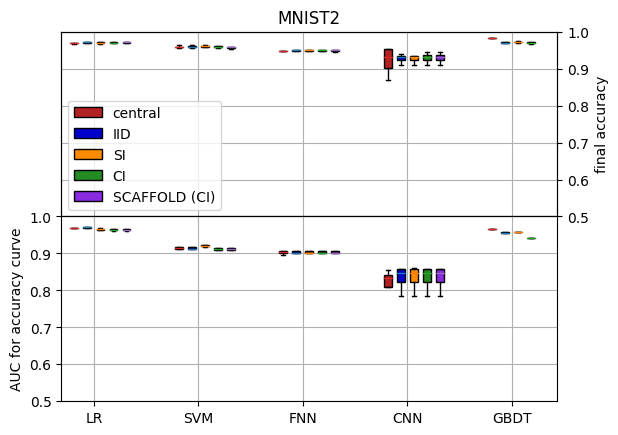

In [138]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_iid = [LR_2c_dict["iid 5e2"].T, SVM_2c_dict["iid"].T, FNN_2c_dict["iid unif"], CNN_2c_dict["iid unif"], DT_2c_dict["iid"].T]
fed_ci = [LR_2c_dict["ci"].T, SVM_2c_dict["ci"].T, FNN_2c_dict["ci unif"], CNN_2c_dict["ci unif"], DT_2c_dict["ci"].T]
fed_si = [LR_2c_dict["si"].T, SVM_2c_dict["si"].T, FNN_2c_dict["si unif"], CNN_2c_dict["si unif"], DT_2c_dict["si"].T]
fed_scaf = [LR_2c_dict["scaf"].T, SVM_2c_dict["scaf"].T, FNN_2c_dict["scaf unif"], CNN_2c_dict['scaf unif']]
cent_list = [LR_2c_dict["central 5e2"].T, SVM_2c_dict["cent 5e5"].T, FNN_2c_dict["cent 5e2 unif"], CNN_2c_dict["cent 5e2 noba"], DT_2c_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex = True, sharey=False)

ax1 = axs[1]
ax2_full = axs[0]

ax2 = ax2_full.twinx()

print_metrics = False

ax1_color = "black"
ax2_color = "black"
#ax1.set_ylabel
#ax2.set_ylabel("final accuracy")
for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_scaf = np.zeros(4)
    aucs_cent = np.zeros(4)
    
    for i in range(4):
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape, fed_si[f_j].shape)
        aucs_iid[i] = auc(np.linspace(0,1,100),fed[i,:])
        aucs_ci[i] = auc(np.linspace(0,1,100), fed_ci[f_j][i,:])
        aucs_si[i] = auc(np.linspace(0,1,100),fed_si[f_j][i,:])
        if f_j < 4:
            aucs_scaf[i] = auc(np.linspace(0,1,100), fed_scaf[f_j][i,:])
        aucs_cent[i] = auc(np.linspace(0,1,100), cent[i,:])
    
    leng = min(fed.shape[1], fed_ci[f_j].shape[1], fed_si[f_j].shape[1], cent.shape[1])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_cent = ax1.boxplot(aucs_cent, positions = [f_j*2], showfliers = False, manage_ticks = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),  medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick", color=ax1_color))
    bp_iid = ax1.boxplot(aucs_iid, positions = [f_j*2 + 0.25 ], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:blue'), boxprops=dict(facecolor="mediumblue", color=ax1_color))
    bp_si = ax1.boxplot(aucs_si, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),medianprops=dict(color='tab:orange'), boxprops=dict(facecolor="darkorange", color=ax1_color))
    bp_ci = ax1.boxplot(aucs_ci, positions = [f_j*2 + 0.75], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:green'), boxprops=dict(facecolor="forestgreen", color=ax1_color))
    
    bp_acc_cent = ax2.boxplot(cent[:4,leng -1],positions = [f_j * 2], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:red"), boxprops = dict(facecolor="firebrick", color=ax2_color))
    bp_acc_iid = ax2.boxplot(fed[:4,leng -1],positions = [f_j * 2 + 0.25], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:blue"), boxprops = dict(facecolor="mediumblue", color=ax2_color))
    bp_acc_si = ax2.boxplot(fed_si[f_j][:4,leng -1],positions = [f_j * 2 + 0.5], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:orange"), boxprops = dict(facecolor="darkorange", color=ax2_color))
    bp_acc_ci = ax2.boxplot(fed_ci[f_j][:4,leng -1],positions = [f_j * 2 + 0.75], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:green"), boxprops = dict(facecolor="forestgreen", color=ax2_color))
    
    if f_j < 4:
        bp_scaf = ax1.boxplot(aucs_scaf, positions = [f_j * 2 + 1],showfliers = False, manage_ticks = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:purple'), boxprops=dict(facecolor="blueviolet", color=ax1_color))
        bp_acc_scaf = ax2.boxplot(fed_scaf[f_j][:4,leng -1],positions = [f_j * 2 + 1], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:purple"), boxprops = dict(facecolor="blueviolet", color=ax2_color))
    
    if print_metrics:
        print("final accuracy for " + legend_labels[f_j] + " central: " + str(np.mean(cent[:,-1])) + " (" + str(np.std(cent[:,-1])) + ")")
        print("final accuracy for " + legend_labels[f_j] + " IID: " + str(np.mean(fed[:,-1])) + " (" + str(np.std(fed[:,-1])) + ")")
        print("final accuracy for " + legend_labels[f_j] + " CI: " + str(np.mean(fed_ci[f_j][:,-1])) + " (" + str(np.std(fed_ci[f_j][:,-1])) + ")")
        print("final accuracy for " + legend_labels[f_j] + " SI: " + str(np.mean(fed_si[f_j][:,-1])) + " (" + str(np.std(fed_si[f_j][:,-1])) + ")")

        print("Mean AUC for " + legend_labels[f_j] + " central: " + str(np.mean(aucs_cent)) + " (" + str(np.std(aucs_cent)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " IID: " + str(np.mean(aucs_iid)) + " (" + str(np.std(aucs_iid)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " CI: " + str(np.mean(aucs_ci)) + " (" + str(np.std(aucs_ci)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " SI: " + str(np.mean(aucs_si)) + " (" + str(np.std(aucs_si)) + ")" )




plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
#plt.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0]], ["central", "IID","SI","CI","SCAFFOLD (CI)"])
#ax1.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0],bp_scaf["boxes"][0]], ["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 3, title = "AUC of accuracy curve")
ax2.legend([bp_acc_cent['boxes'][0], bp_acc_iid["boxes"][0], bp_acc_si["boxes"][0], bp_acc_ci["boxes"][0],bp_acc_scaf["boxes"][0]],["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 3)
ax1.set_ylim([0.5, 1])
ax2.set_ylim([0.5, 1])
ax1.tick_params(axis="y", labelcolor = ax1_color)
ax2.tick_params(axis="y", labelcolor = ax2_color)
ax1.grid(True)
ax2_full.set_yticks([])
#ax1.set_yticks([0.5, 1])
ax2.grid(True)
ax2_full.grid(True)
plt.title("MNIST2")
plt.xlabel("classifiers")
ax1.set_ylabel("AUC for accuracy curve", color = ax1_color)
ax2.set_ylabel("final accuracy", color = ax2_color)

plt.savefig("AUC_MNIST2.eps", format="eps")

Text(0.5, 1.0, 'CNN, MNIST2')

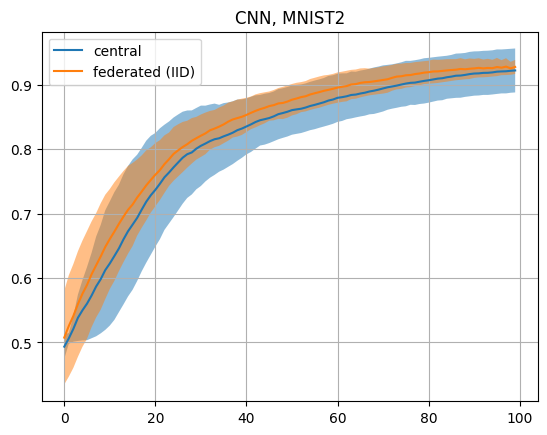

In [5]:
plot_range(CNN_2c_dict['cent 5e2 noba'][:4,:], alpha =1, label = "central")
plot_range(CNN_2c_dict['iid unif'], alpha = 1, label = "federated (IID)")
plt.grid()
plt.legend()
plt.title("CNN, MNIST2")

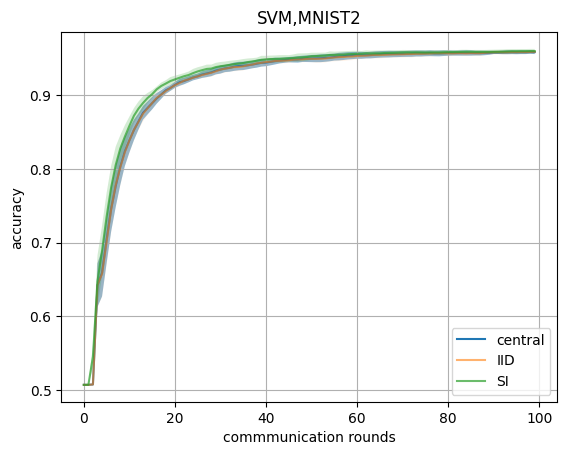

In [161]:
#plot_range(SVM_2c_dict['si'].T, alpha = 1, label = "SI")
plot_range(SVM_2c_dict['cent 5e5'].T, alpha = 1, label = "central")
plot_range(SVM_2c_dict['iid'].T, alpha = 0.6, label = "IID")
plot_range(SVM_2c_dict['si wc'].T, alpha = 0.7, label = "SI")
plt.legend()
plt.grid()
plt.xlabel("commmunication rounds")
plt.ylabel("accuracy")
plt.title("SVM,MNIST2")
plt.savefig("MNIST2_SVM.png", format="png")

Text(0.5, 1.0, 'DT, MNIST2')

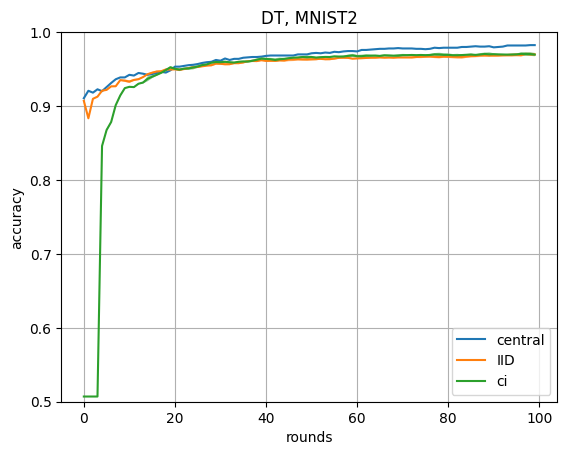

In [8]:
plot_range(DT_2c_dict["cent"].T, alpha = 1, label = "central")
plot_range(DT_2c_dict["iid"].T, alpha = 1, label = "IID")
plot_range(DT_2c_dict['ci'].T, alpha = 1, label = "ci")
plt.ylim([0.5, 1])
plt.grid(True)
plt.xlabel("rounds")
plt.legend()
plt.ylabel("accuracy")
plt.title("DT, MNIST2")

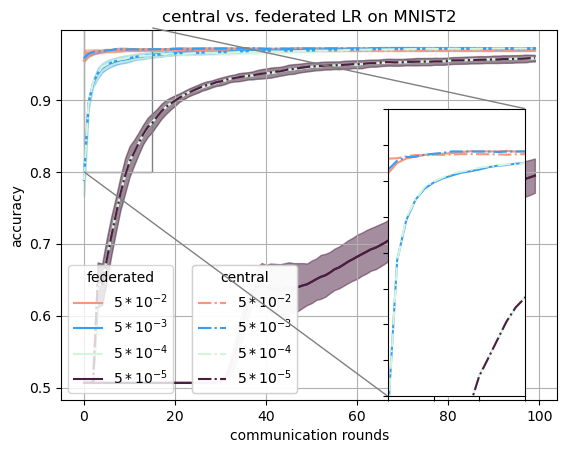

In [4]:
LR_2c_dict = load_2c_LR()


colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]
plot_keys_fed = ["iid 5e2", "iid 5e3", "iid 5e4", "iid 5e5"]
plot_keys_cent = ["central 5e2", "central 5e3", "central 5e4", "central 5e5"]
#colors = ['b', 'y', 'g', 'r', 'k']
legend_labels = ["$5*10^{-2}$", "$5*10^{-3}$", "$5*10^{-4}$", "$5*10^{-5}$"]


#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1

lines_fed = []
lines_cent = []

fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(LR_2c_dict["iid 5e2"])
#axins.plot(LR_2c_dict["iid 5e2"])


for key_fed, key_cent, color in zip(plot_keys_fed, plot_keys_cent, colors):
    line_fed = plot_range(LR_2c_dict[key_fed].T, color = color, alpha = 1)
    line_cent = plot_range(LR_2c_dict[key_cent].T, line = "-.", color = color, alpha = 1)
    
    ax.add_artist(line_fed)
    ax.add_artist(line_cent)
    
    lines_fed.append(line_fed)
    lines_cent.append(line_cent)

    
legend1 = plt.legend(lines_fed, legend_labels, loc=3, title= "federated")    
legend2 = plt.legend(lines_cent, legend_labels, loc=3, title= "central", bbox_to_anchor=(0.25,0))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(475,200))

for key_fed, key_cent, color in zip(plot_keys_fed, plot_keys_cent, colors):
    mean_fed = np.mean(LR_2c_dict[key_fed],axis=1)
    mean_cent = np.mean(LR_2c_dict[key_cent], axis=1)
    
    axins.plot(mean_fed, color=color)
    axins.plot(mean_cent,"-.", color=color)
    
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(LR_2c_dict["ci"][:,1],color= 'y')
#axins.plot(LR_4c_dict["ci"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("central vs. federated LR on MNIST2")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
plt.savefig("MNIST2_lrate.png", format="png")

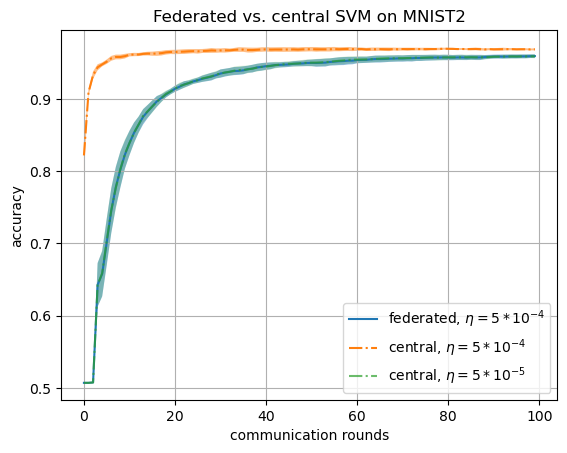

In [6]:
plot_range(SVM_2c_dict["iid"].T, label = "federated, $\eta = 5 * 10^{-4}$", alpha = 1)
plot_range(SVM_2c_dict["cent 5e4"].T, line = "-.", alpha = 1, label = "central, $\eta = 5*10^{-4}$")
plot_range(SVM_2c_dict["cent 5e5"].T, line = "-.", alpha = 0.7, label = "central, $\eta = 5*10^{-5}$")
plt.legend()
plt.grid(True)
plt.title("Federated vs. central SVM on MNIST2")
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.savefig("SVM_lrates.png", format="png")

(<Figure size 2000x1000 with 2 Axes>,
 <AxesSubplot:xlabel='rounds', ylabel='clients'>)

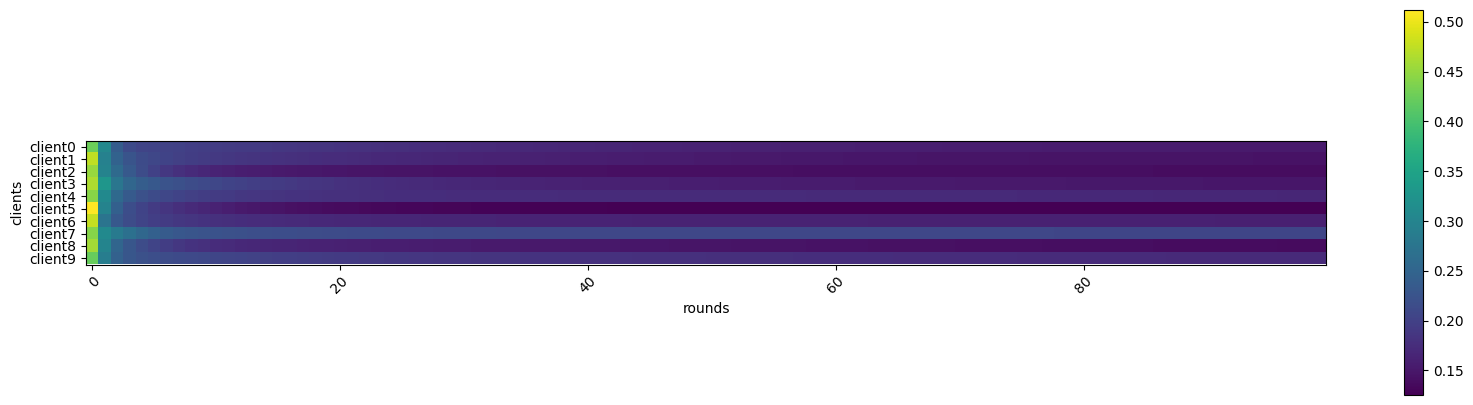

In [192]:
prefix = "../datafiles/LR/2class/"

newmap_IID = np.load(prefix + "iid/MNIST_2classIID_no_comp_LR_lr0.005_lepo1_ba1nc_newmap_seed0.npy")

show_map(newmap_IID, normalized = False)

(<Figure size 2000x1000 with 2 Axes>,
 <AxesSubplot:xlabel='rounds', ylabel='clients'>)

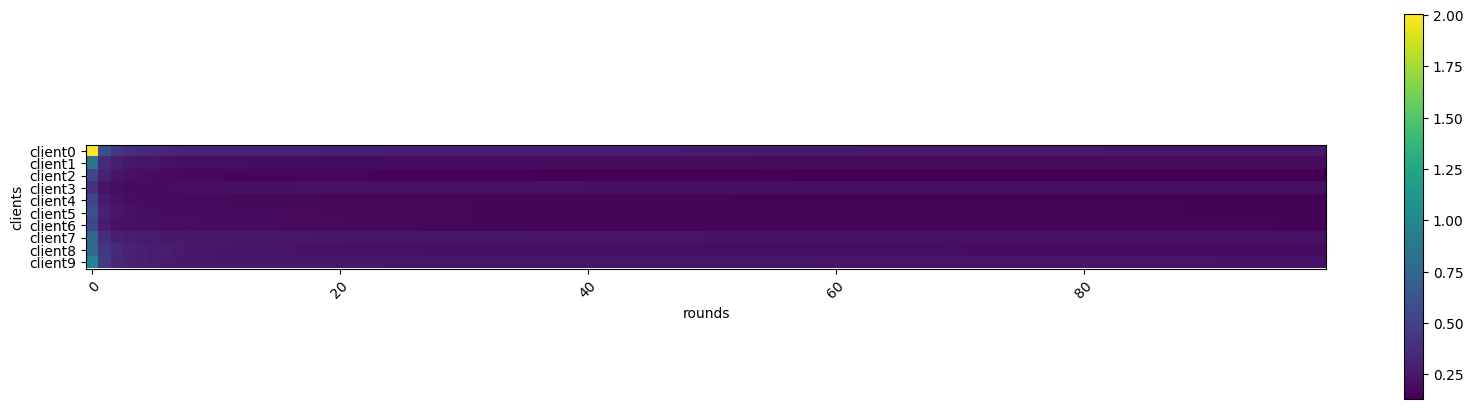

In [195]:
newmap_CI = np.load(prefix + "ci/MNIST_2classci_no_comp_LR_lr0.005_lepo1_ba1nc_newmap_seed0.npy")
show_map(newmap_CI, normalized = False)

In [2]:
prefix = "../datafiles/FNN/MNIST_2class/"

#prevmap_IID = np.load(prefix + "IID/MNIST_2classIID_size_comp_FNN_lr0.05_dist_unif_lepo1_ba1prevmap_seed0.npy")
newmap_IID = np.load(prefix + "IID/MNIST_2classIID_size_comp_FNN_lr0.05_dist_unif_lepo1_ba1newmap_seed0.npy")
newmap_CI = np.load(prefix + "ci/MNIST_2classci_size_comp_FNN_lr0.05_dist_unif_lepo1_ba1newmap_seed0.npy")


plt.rcParams['figure.figsize'] = [20, 10]



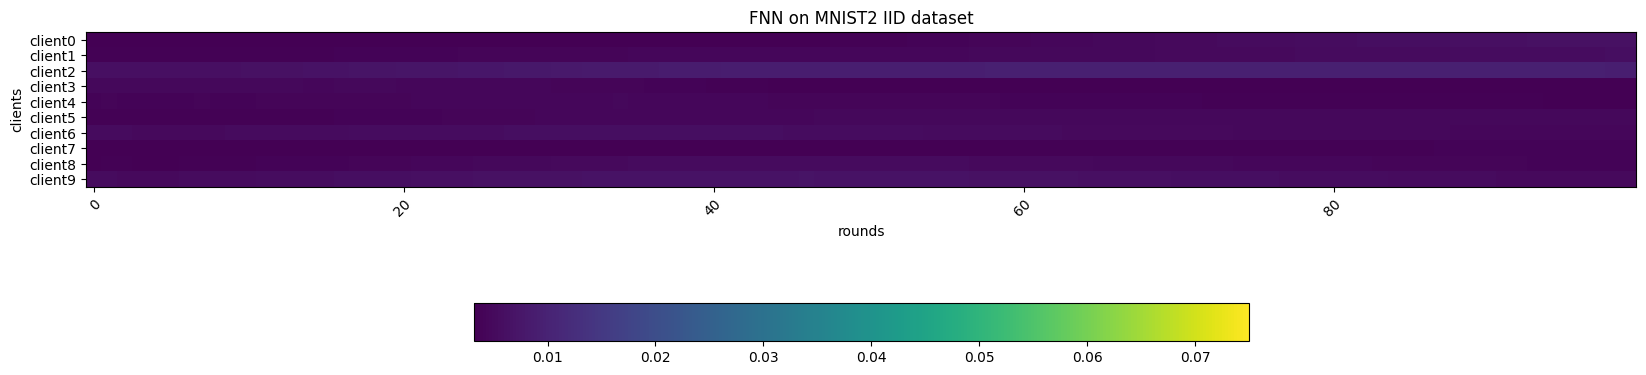

In [5]:
fig_iid, ax_iid, im_iid = show_map(newmap_IID, normalized = False, title = "FNN on MNIST2 IID dataset", img_to_scale = newmap_CI)

plt.savefig("MNIST2_FNN_IID_heatmap.png")

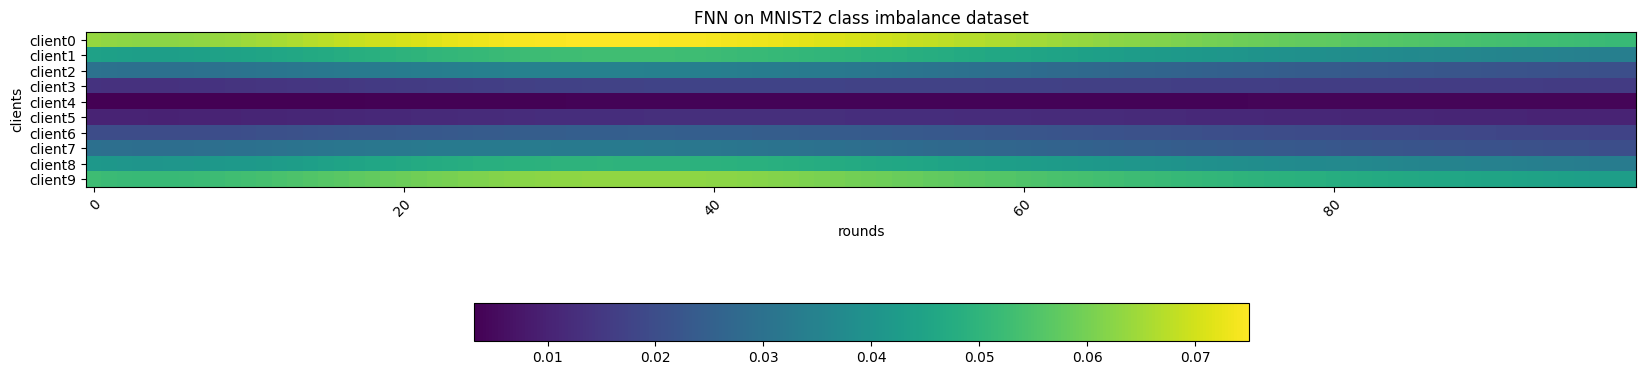

In [6]:
fig_ci, ax_ci, im_ci = show_map(newmap_CI, normalized = False, title = "FNN on MNIST2 class imbalance dataset")

plt.savefig("MNIST2_FNN_CI_heatmap.png")

## MNIST4

<a id='MNIST4'></a>

back to [ToC](#ToC)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


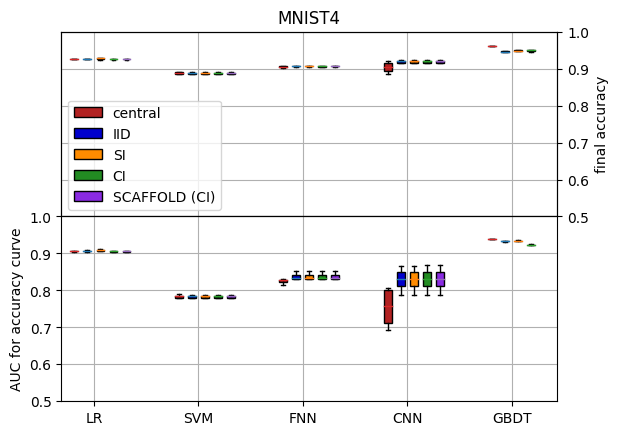

In [158]:
LR_4c_dict = load_4c_LR()
SVM_4c_dict = load_4c_SVM()
FNN_4c_dict = load_4c_FNN()
CNN_4c_dict = load_4c_CNN()
DT_4c_dict = load_4c_DT()

fed_iid = [LR_4c_dict["iid"].T, SVM_4c_dict["iid"].T, FNN_4c_dict["iid unif"], CNN_4c_dict["iid ba1 unif"], DT_4c_dict["iid"].T]
fed_ci = [LR_4c_dict["ci"].T, SVM_4c_dict["ci"].T, FNN_4c_dict["ci unif"], CNN_4c_dict["ci ba1"], DT_4c_dict["ci"].T]
fed_si = [LR_4c_dict["si"].T, SVM_4c_dict["si"].T, FNN_4c_dict["si unif"], CNN_4c_dict["si ba1"], DT_4c_dict["si"].T]
fed_scaf = [LR_4c_dict["scaf"].T, SVM_4c_dict["scaf"].T, FNN_4c_dict["scaf unif"], CNN_4c_dict["scaf ba1"]]

cent_list = [LR_4c_dict["central 5e5"].T, SVM_4c_dict["cent 5e6"].T, FNN_4c_dict["cent 5e2"], CNN_4c_dict["cent ba1"], DT_4c_dict["cent"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex = True, sharey=False)

ax1 = axs[1]
ax2_full = axs[0]

ax2 = ax2_full.twinx()

ax1_color = "black"
ax2_color = "black"

print_metrics = False

for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_scaf = np.zeros(4)
    aucs_cent = np.zeros(4)
    for i in range(4):
        #print(legend_labels[f_j], cent.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape, fed_si[f_j].shape)
        leng = min(fed.shape[1], fed_ci[f_j].shape[1], fed_si[f_j].shape[1], cent.shape[1])
        #print(leng)
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_ci[i] = auc(np.linspace(0,1,leng), fed_ci[f_j][i,:leng])
        aucs_si[i] = auc(np.linspace(0,1,leng),fed_si[f_j][i,:leng])
        if f_j < 4:
            aucs_scaf[i] = auc(np.linspace(0,1,leng), fed_scaf[f_j][i,:leng])
            
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_cent = ax1.boxplot(aucs_cent, positions = [f_j*2], showfliers = False, manage_ticks = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),  medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick", color=ax1_color))
    bp_iid = ax1.boxplot(aucs_iid, positions = [f_j*2 + 0.25 ], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:blue'), boxprops=dict(facecolor="mediumblue", color=ax1_color))
    bp_si = ax1.boxplot(aucs_si, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),medianprops=dict(color='tab:orange'), boxprops=dict(facecolor="darkorange", color=ax1_color))
    bp_ci = ax1.boxplot(aucs_ci, positions = [f_j*2 + 0.75], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:green'), boxprops=dict(facecolor="forestgreen", color=ax1_color))
        
    bp_acc_cent = ax2.boxplot(cent[:4,leng -1],positions = [f_j * 2], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:red"), boxprops = dict(facecolor="firebrick", color=ax2_color))
    bp_acc_iid = ax2.boxplot(fed[:4,leng -1],positions = [f_j * 2 + 0.25], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:blue"), boxprops = dict(facecolor="mediumblue", color=ax2_color))
    bp_acc_si = ax2.boxplot(fed_si[f_j][:4,leng -1],positions = [f_j * 2 + 0.5], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:orange"), boxprops = dict(facecolor="darkorange", color=ax2_color))
    bp_acc_ci = ax2.boxplot(fed_ci[f_j][:4,leng -1],positions = [f_j * 2 + 0.75], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:green"), boxprops = dict(facecolor="forestgreen", color=ax2_color))
        
    if f_j < 4:
        bp_scaf = ax1.boxplot(aucs_scaf, positions = [f_j * 2 + 1],showfliers = False, manage_ticks = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:purple'), boxprops=dict(facecolor="blueviolet", color=ax1_color))
        bp_acc_scaf = ax2.boxplot(fed_scaf[f_j][:4,leng -1],positions = [f_j * 2 + 1], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:purple"), boxprops = dict(facecolor="blueviolet", color=ax2_color))

    if print_metrics:
        print("final accuracy for " + legend_labels[f_j] + " central: " + str(round(np.mean(cent[:,-1]), 2)) + " (" + str(round(np.std(cent[:,-1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " IID: " + str(round(np.mean(fed[:,-1]), 2)) + " (" + str(round(np.std(fed[:,-1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " CI: " + str(round(np.mean(fed_ci[f_j][:,-1]), 2)) + " (" + str(round(np.std(fed_ci[f_j][:,-1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " SI: " + str(round(np.mean(fed_si[f_j][:,-1]), 2)) + " (" + str(round(np.std(fed_si[f_j][:,-1]), 3)) + ")")

        print("Mean AUC for " + legend_labels[f_j] + " central: " + str(round(np.mean(aucs_cent), 2)) + " (" + str(round(np.std(aucs_cent), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " IID: " + str(round(np.mean(aucs_iid), 2)) + " (" + str(round(np.std(aucs_iid), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " CI: " + str(round(np.mean(aucs_ci), 2)) + " (" + str(round(np.std(aucs_ci), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " SI: " + str(round(np.mean(aucs_si), 2)) + " (" + str(round(np.std(aucs_si), 3)) + ")" )
    
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
#plt.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0]], ["central", "IID","SI","CI","SCAFFOLD (CI)"])
#ax1.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0],bp_scaf["boxes"][0]], ["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 3)
ax2.legend([bp_acc_cent['boxes'][0], bp_acc_iid["boxes"][0], bp_acc_si["boxes"][0], bp_acc_ci["boxes"][0],bp_acc_scaf["boxes"][0]],["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 3)
ax1.set_ylim([0.5, 1])
ax2.set_ylim([0.5, 1])
ax1.tick_params(axis="y", labelcolor = ax1_color)
ax2.tick_params(axis="y", labelcolor = ax2_color)
ax1.grid(True)
ax2_full.set_yticks([])
ax2.grid(True)
ax2_full.grid(True)

plt.title("MNIST4")
plt.xlabel("classifiers")
ax1.set_ylabel("AUC for accuracy curve", color = ax1_color)
ax2.set_ylabel("final accuracy", color = ax2_color)

plt.savefig("AUC_MNIST4.eps", format="eps")

Text(0.5, 1.0, 'MNIST4, LR')

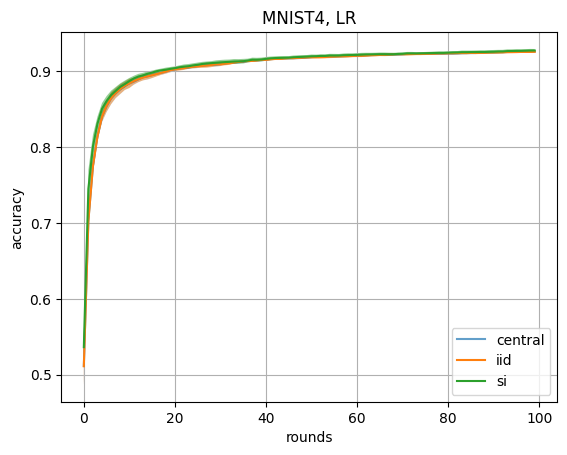

In [19]:
plot_range(LR_4c_dict['central 5e5'].T, alpha = 0.7, label = "central")
plot_range(LR_4c_dict['iid'].T, alpha = 1, label = "iid")
plot_range(LR_4c_dict['si'].T, alpha = 1, label = "si")
plt.legend()
plt.grid()
plt.xlabel("rounds")
plt.ylabel("accuracy")
plt.title("MNIST4, LR")

Text(0.5, 1.0, 'MNIST4, FNN')

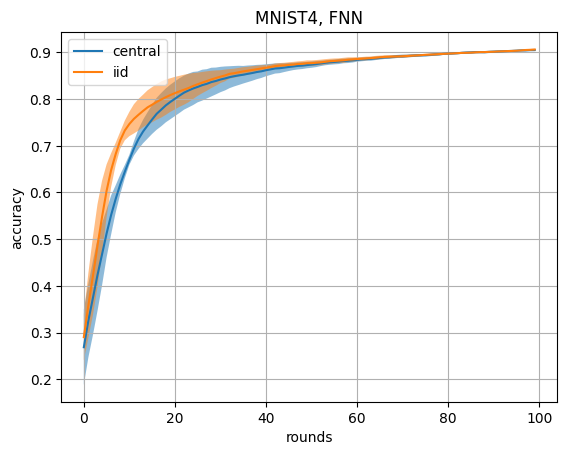

In [21]:
plot_range(FNN_4c_dict["cent 5e2"], alpha = 1, label = "central")
plot_range(FNN_4c_dict['iid unif'], alpha = 1, label = "iid")
plt.legend()
plt.grid()
plt.xlabel("rounds")
plt.ylabel("accuracy")
plt.title("MNIST4, FNN")

(0.2, 1.0)

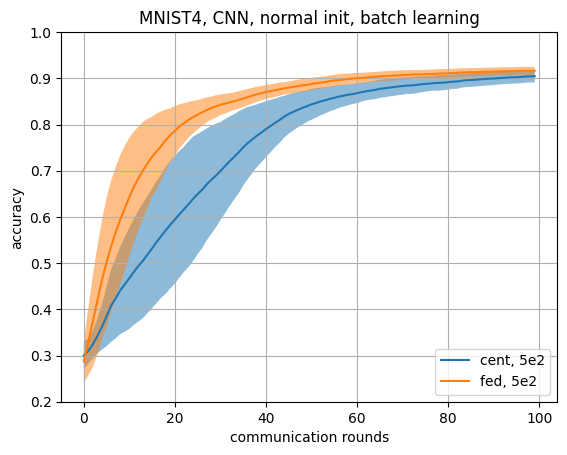

In [39]:
plot_range(CNN_4c_dict["cent ba1"], alpha = 1, label = "cent, 5e2")

plot_range(CNN_4c_dict["iid ba1 unif"], alpha = 1, label = "fed, 5e2")
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend(loc=4)
plt.title("MNIST4, CNN, normal init, batch learning")
plt.ylim([0.2, 1])

(0.2, 1.0)

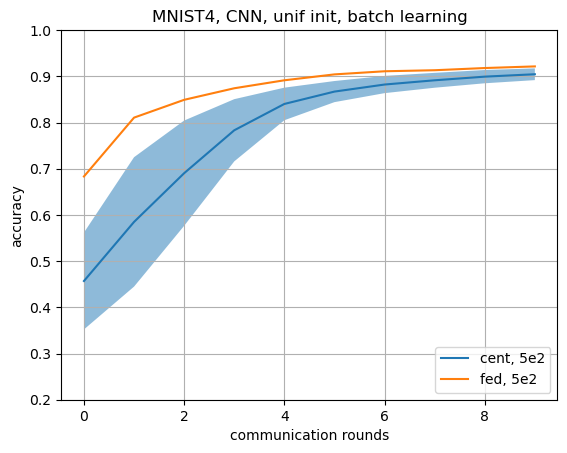

In [19]:
#plot_range(CNN_4c_dict["iid ba10 unif"], alpha = 1, label = "fed, 5e2")
plot_range(CNN_4c_dict["cent 5e2"][:,0:10], alpha = 1, label = "cent, 5e2")
plt.plot(CNN_4c_dict["iid ba10 unif"][0:10], label = "fed, 5e2")

plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend(loc=4)
plt.title("MNIST4, CNN, unif init, batch learning")
plt.ylim([0.2, 1])

(0.2, 1.0)

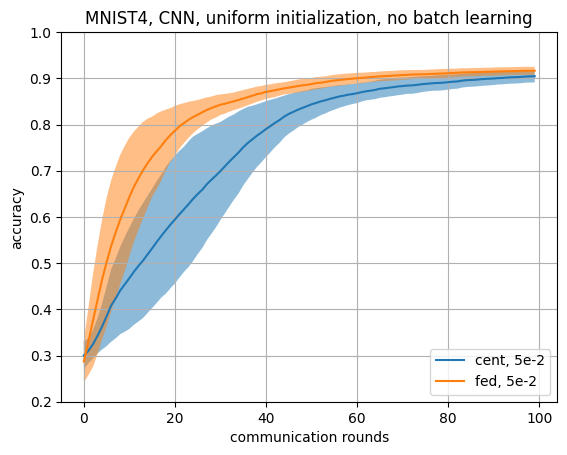

In [20]:
plot_range(CNN_4c_dict["cent ba1"], alpha = 1, label = "cent, 5e-2")
#plot_range(CNN_4c_dict['cent 1e1 unif'], alpha = 1, label = "cent, 1e-1")
plot_range(CNN_4c_dict["iid ba1 unif"], alpha = 1, label = "fed, 5e-2")
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend(loc=4)
plt.title("MNIST4, CNN, uniform initialization, no batch learning")
plt.ylim([0.2, 1])

## Fashion MNIST

<a id='fashion_MNIST'></a>

back to [ToC](#ToC)

Text(0, 0.5, 'final accuracy')

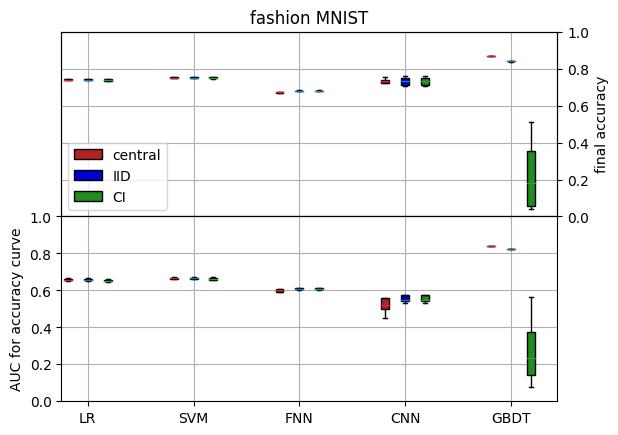

In [2]:
LR_f_dict = load_f_LR()
SVM_f_dict = load_f_SVM()
FNN_f_dict = load_f_FNN()
CNN_f_dict = load_f_CNN()
DT_f_dict = load_f_DT()

fed_iid = [LR_f_dict["iid"].T, SVM_f_dict["iid"].T, FNN_f_dict["iid"], CNN_f_dict["iid ba1"].T, DT_f_dict["iid"].T]
fed_ci = [LR_f_dict["ci"].T, SVM_f_dict["ci"].T, FNN_f_dict["ci"], CNN_f_dict["ci ba1"].T, DT_f_dict["ci"].T]
cent_list = [LR_f_dict["central 5e6"].T, SVM_f_dict["central 5e6"], FNN_f_dict["central 5e2"], CNN_f_dict["cent ba1"], DT_f_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex = True, sharey=False)

ax1 = axs[1]
ax2_full = axs[0]

ax2 = ax2_full.twinx()

print_metrics = False

ax1_color = "black"
ax2_color = "black"

for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_cent = np.zeros(4)
    for i in range(4):
        #print(legend_labels[f_j], cent.shape)
        #print(fed_ci[f_j])
        #print(legend_labels[f_j], cent.shape, fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1], fed_ci[f_j].shape[1], cent.shape[1])
        #print(leng)
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_ci[i] = auc(np.linspace(0,1,leng), fed_ci[f_j][i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    
    bp_cent = ax1.boxplot(aucs_cent, positions = [f_j*2], showfliers = False, manage_ticks = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),  medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick", color=ax1_color))
    bp_iid = ax1.boxplot(aucs_iid, positions = [f_j*2 + 0.375 ], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:blue'), boxprops=dict(facecolor="mediumblue", color=ax1_color))
    #bp_si = ax1.boxplot(aucs_si, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),medianprops=dict(color='tab:orange'), boxprops=dict(facecolor="darkorange", color=ax1_color))
    bp_ci = ax1.boxplot(aucs_ci, positions = [f_j*2 + 0.75], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:green'), boxprops=dict(facecolor="forestgreen", color=ax1_color))
     
    bp_acc_cent = ax2.boxplot(cent[:4,leng -1],positions = [f_j * 2], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:red"), boxprops = dict(facecolor="firebrick", color=ax2_color))
    bp_acc_iid = ax2.boxplot(fed[:4,leng -1],positions = [f_j * 2 + 0.375], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:blue"), boxprops = dict(facecolor="mediumblue", color=ax2_color))
    bp_acc_ci = ax2.boxplot(fed_ci[f_j][:4,leng -1],positions = [f_j * 2 + 0.75], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:green"), boxprops = dict(facecolor="forestgreen", color=ax2_color))
 
    if print_metrics:
        print("final accuracy for " + legend_labels[f_j] + " central: " + str(round(np.mean(cent[:,leng - 1]), 2)) + " (" + str(round(np.std(cent[:,leng - 1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " IID: " + str(round(np.mean(fed[:,leng - 1]), 2)) + " (" + str(round(np.std(fed[:,leng - 1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " CI: " + str(round(np.mean(fed_ci[f_j][:,leng - 1]), 2)) + " (" + str(round(np.std(fed_ci[f_j][:,leng - 1]), 3)) + ")")
        #print("final accuracy for " + legend_labels[f_j] + " SI: " + str(round(np.mean(fed_si[f_j][:,-1]), 2)) + " (" + str(round(np.std(fed_si[f_j][:,-1]), 3)) + ")")

        print("Mean AUC for " + legend_labels[f_j] + " central: " + str(round(np.mean(aucs_cent), 2)) + " (" + str(round(np.std(aucs_cent), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " IID: " + str(round(np.mean(aucs_iid), 2)) + " (" + str(round(np.std(aucs_iid), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " CI: " + str(round(np.mean(aucs_ci), 2)) + " (" + str(round(np.std(aucs_ci), 3)) + ")" )
        #print("Mean AUC for " + legend_labels[f_j] + " SI: " + str(round(np.mean(aucs_si), 2)) + " (" + str(round(np.std(aucs_si), 3)) + ")" )
    
#print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
#plt.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0]], ["central", "IID","SI","CI","SCAFFOLD (CI)"])
#ax1.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_ci["boxes"][0]], ["central","IID","CI"], loc = 4)
ax2.legend([bp_acc_cent['boxes'][0], bp_acc_iid["boxes"][0],  bp_acc_ci["boxes"][0]],["central","IID","CI"], loc = 3)
ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])
ax1.tick_params(axis="y", labelcolor = ax1_color)
ax2.tick_params(axis="y", labelcolor = ax2_color)
ax1.grid()
ax2.grid()
ax2_full.set_yticks([])
ax2_full.grid()
plt.title("fashion MNIST")
plt.xlabel("classifiers")
ax1.set_ylabel("AUC for accuracy curve", color = ax1_color)
ax2.set_ylabel("final accuracy", color = ax2_color)

#plt.savefig("AUC_fashionMNIST.eps", format="eps")

In [3]:
plt.rcParams['figure.figsize']


[6.4, 4.8]

Text(0.5, 1.0, 'FNN, fashion MNIST')

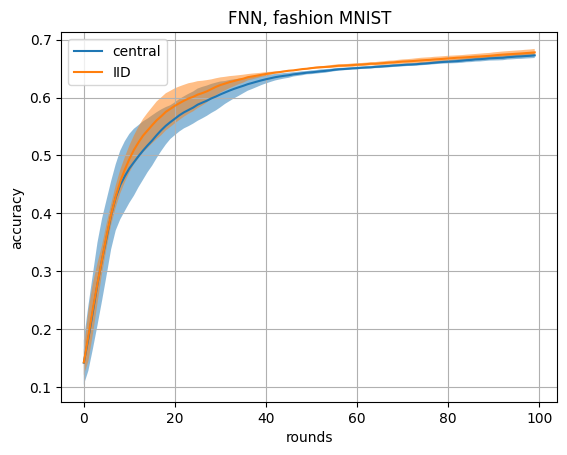

In [23]:
plot_range(FNN_f_dict['central 5e2'][:,:100], alpha = 1, label = "central")
plot_range(FNN_f_dict["iid"], alpha = 1, label = "IID")
plt.grid(True)
plt.legend()
plt.xlabel("rounds")
plt.ylabel("accuracy")
plt.title("FNN, fashion MNIST")

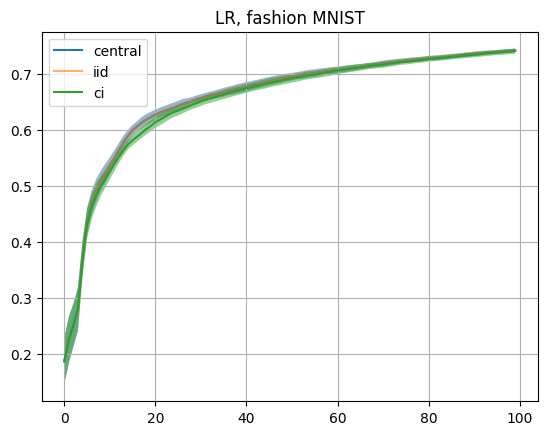

In [32]:
plot_range(LR_f_dict["central 5e6"].T, alpha = 1, label = "central")
plot_range(LR_f_dict["iid"][:100,:].T, alpha = 0.6, label = 'iid')
plot_range(LR_f_dict['ci'].T, alpha = 1, label = "ci")
plt.legend()
plt.title("LR, fashion MNIST")
plt.grid()

In [30]:
LR_f_dict["iid"].shape

(200, 4)

Text(0.5, 1.0, 'CNN, fashion MNIST')

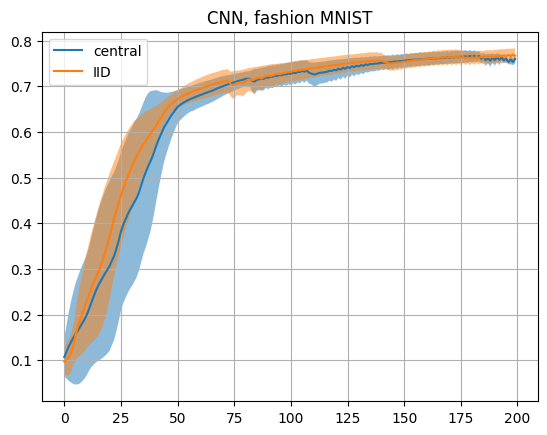

In [34]:
plot_range(CNN_f_dict["cent ba1"], alpha =1, label = "central")
plot_range(CNN_f_dict["iid ba1"].T, alpha = 1, label = "IID")
plt.grid()
plt.legend()
plt.title("CNN, fashion MNIST")

## A2

<a id='A2'></a>

back to [ToC](#ToC)

In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


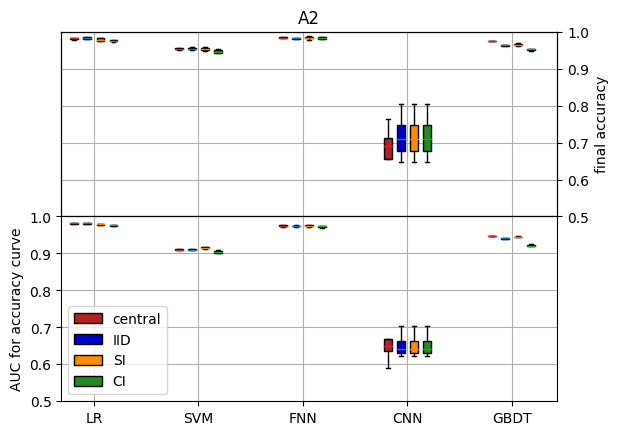

In [121]:
LR_A2_dict = load_A2_LR()
SVM_A2_dict = load_A2_SVM()
FNN_A2_dict = load_A2_FNN()
CNN_A2_dict = load_A2_CNN()
DT_A2_dict = load_A2_DT()

fed_iid = [LR_A2_dict["IID"], SVM_A2_dict["iid"].T, FNN_A2_dict["IID unif"], CNN_A2_dict["IID unif"], DT_A2_dict["IID"]]
fed_ci = [LR_A2_dict["CI"], SVM_A2_dict["ci"].T, FNN_A2_dict["CI unif"], CNN_A2_dict["CI unif"], DT_A2_dict["CI"]]
fed_si = [LR_A2_dict["SI"], SVM_A2_dict["si"].T, FNN_A2_dict["SI unif"], CNN_A2_dict["SI unif"], DT_A2_dict["SI"]]
cent_list = [LR_A2_dict["central 5e4"], SVM_A2_dict["central 5e6"].T, FNN_A2_dict["central 5e2"], CNN_A2_dict["central ba1"].T, DT_A2_dict["central"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
notch = False

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex = True, sharey=False)

ax1 = axs[1]
ax2_full = axs[0]

ax2 = ax2_full.twinx()
#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

print_metrics = False

ax1_color = "black"
ax2_color = "black"

for f_j, (fed, cent) in enumerate(zip(fed_iid, cent_list)):
    aucs_iid = np.zeros(4)
    aucs_ci = np.zeros(4)
    aucs_si = np.zeros(4)
    aucs_cent = np.zeros(4)
    for i in range(4):
        #print(legend_labels[f_j], cent.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1],fed_si[f_j].shape[1], fed_ci[f_j].shape[1], cent.shape[1])
        #print(leng)
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_ci[i] = auc(np.linspace(0,1,leng), fed_ci[f_j][i,:leng])
        aucs_si[i] = auc(np.linspace(0,1,leng), fed_si[f_j][i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_cent = ax1.boxplot(aucs_cent, positions = [f_j*2], showfliers = False, manage_ticks = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),  medianprops=dict(color='tab:red'), boxprops=dict(facecolor="firebrick", color=ax1_color))
    bp_iid = ax1.boxplot(aucs_iid, positions = [f_j*2 + 0.25 ], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:blue'), boxprops=dict(facecolor="mediumblue", color=ax1_color))
    bp_si = ax1.boxplot(aucs_si, positions = [f_j*2 + 0.5], showfliers = False, patch_artist=True, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color),medianprops=dict(color='tab:orange'), boxprops=dict(facecolor="darkorange", color=ax1_color))
    bp_ci = ax1.boxplot(aucs_ci, positions = [f_j*2 + 0.75], showfliers = False, patch_artist=True,capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), medianprops=dict(color='tab:green'), boxprops=dict(facecolor="forestgreen", color=ax1_color))
    
    bp_acc_cent = ax2.boxplot(cent[:4,leng -1],positions = [f_j * 2], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:red"), boxprops = dict(facecolor="firebrick", color=ax2_color))
    bp_acc_iid = ax2.boxplot(fed[:4,leng -1],positions = [f_j * 2 + 0.25], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:blue"), boxprops = dict(facecolor="mediumblue", color=ax2_color))
    bp_acc_si = ax2.boxplot(fed_si[f_j][:4,leng -1],positions = [f_j * 2 + 0.5], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:orange"), boxprops = dict(facecolor="darkorange", color=ax2_color))
    bp_acc_ci = ax2.boxplot(fed_ci[f_j][:4,leng -1],positions = [f_j * 2 + 0.75], notch= False, showfliers = False, capprops = dict(color=ax2_color), whiskerprops=dict(color=ax2_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:green"), boxprops = dict(facecolor="forestgreen", color=ax2_color))
 
    if print_metrics:
        print("final accuracy for " + legend_labels[f_j] + " central: " + str(round(np.mean(cent[:,-1]), 2)) + " (" + str(round(np.std(cent[:,-1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " IID: " + str(round(np.mean(fed[:,-1]), 2)) + " (" + str(round(np.std(fed[:,-1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " CI: " + str(round(np.mean(fed_ci[f_j][:,-1]), 2)) + " (" + str(round(np.std(fed_ci[f_j][:,-1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " SI: " + str(round(np.mean(fed_si[f_j][:,-1]), 2)) + " (" + str(round(np.std(fed_si[f_j][:,-1]), 3)) + ")")

        print("Mean AUC for " + legend_labels[f_j] + " central: " + str(round(np.mean(aucs_cent), 2)) + " (" + str(round(np.std(aucs_cent), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " IID: " + str(round(np.mean(aucs_iid), 2)) + " (" + str(round(np.std(aucs_iid), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " CI: " + str(round(np.mean(aucs_ci), 2)) + " (" + str(round(np.std(aucs_ci), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " SI: " + str(round(np.mean(aucs_si), 2)) + " (" + str(round(np.std(aucs_si), 3)) + ")" )

#print(np.arange(0, len(legend_labels) * 2,2))
#print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
#plt.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0]], ["central", "IID","SI","CI","SCAFFOLD (CI)"])
ax1.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0]], ["central","IID","SI","CI"], loc = 3)
#ax2.legend([bp_acc_cent['boxes'][0], bp_acc_iid["boxes"][0], bp_acc_si["boxes"][0], bp_acc_ci["boxes"][0],bp_acc_scaf["boxes"][0]],["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 4, title = "final accuracy")
ax1.set_ylim([0.5, 1])
ax2.set_ylim([0.5, 1])
ax1.tick_params(axis="y", labelcolor = ax1_color)
ax2.tick_params(axis="y", labelcolor = ax2_color)
ax1.grid(True)
ax2_full.set_yticks([])
#ax1.set_yticks([0.5, 1])
ax2.grid(True)
ax2_full.grid(True)

plt.title("A2")
plt.xlabel("classifiers")
ax1.set_ylabel("AUC for accuracy curve", color = ax1_color)
ax2.set_ylabel("final accuracy", color = ax2_color)

plt.savefig("AUC_A2.eps", format="eps")

(0.9, 1.0)

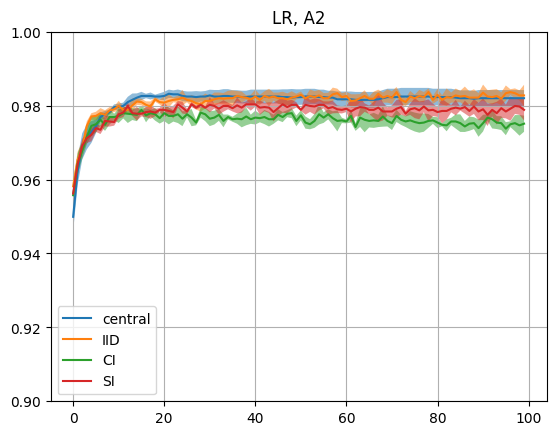

In [36]:
plot_range(LR_A2_dict["central 5e4"][:,:100], alpha = 1, label = "central")
plot_range(LR_A2_dict["IID"], alpha = 1, label = "IID")
plot_range(LR_A2_dict['CI'], alpha = 1, label = "CI")
plot_range(LR_A2_dict['SI'], alpha = 1, label = "SI")
plt.legend()
plt.grid()
plt.title("LR, A2")
plt.ylim([0.9, 1])

In [60]:
CNN_A2_dict["central ba1"].shape

(4, 100)

Text(0.5, 1.0, 'CNN, A2')

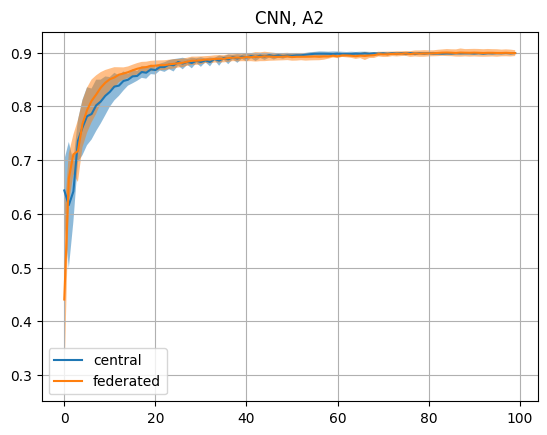

In [38]:
plot_range(CNN_A2_dict["central ba1"], alpha = 1, label = "central")
plot_range(CNN_A2_dict["IID unif"], alpha = 1, label = "federated")
#plot_range(FNN_A2_dict[''])
plt.legend()
plt.grid()
plt.title("CNN, A2")

## AML

<a id='AML'></a>

back to [ToC](#ToC)

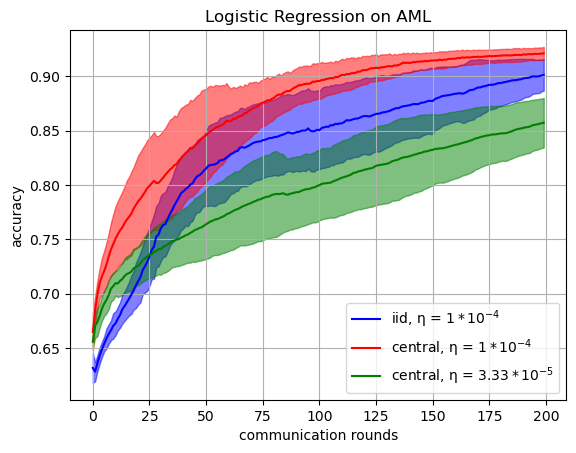

In [4]:
LR_dict = load_3node_LR()

plot_range(LR_dict["iid"], color="blue", alpha = 1)
plot_range(LR_dict["central"], color = "red", alpha = 1)
plot_range(LR_dict["central 3e5"], color="green", alpha = 1)
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $1*10^{-4}$","central, \u03B7 = $1*10^{-4}$", "central, \u03B7 = $3.33*10^{-5}$"], loc=4)
plt.title("Logistic Regression on AML")
plt.savefig("LR_AML.png", format = "png")

Text(0, 0.5, 'accuracy')

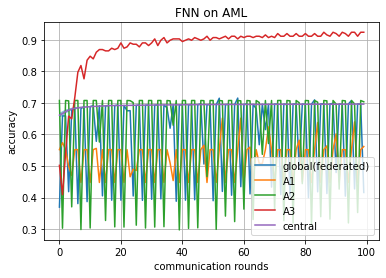

In [20]:
FNN_dict = load_3node_FNN()

plt.plot(np.arange(100), FNN_dict["ci"])
for i in range(3):
    plt.plot(np.arange(100), FNN_dict["ci local"][i,:,:])
plot_range(FNN_dict["central"])
plt.legend(["global(federated)", "A1", "A2", "A3", "central"])
plt.title("FNN on AML")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


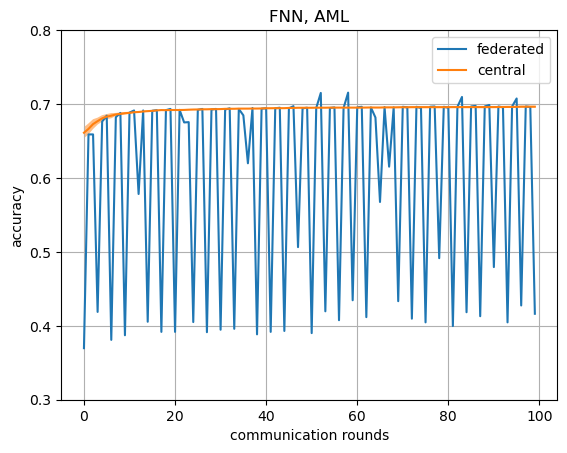

In [6]:
FNN_dict = load_3node_FNN()


plot_range(FNN_dict['ci'].T, alpha = 1, label = "federated")

plot_range(FNN_dict["central"], alpha = 1, label = "central")
plt.grid(True)
plt.title("FNN, AML")
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend()
plt.ylim([0.3, 0.8])
plt.savefig("AML_before.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


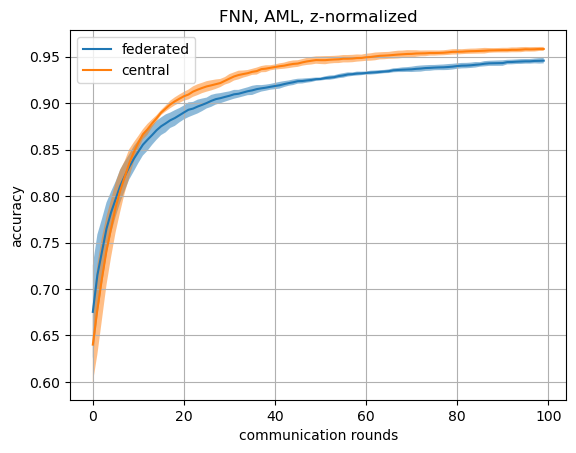

In [7]:
FNN_dict = load_3node_FNN()
#colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]

plot_range(FNN_dict["redemp g"], alpha = 1, label = "federated")
plot_range(FNN_dict["redemp central"], alpha = 1, label = "central")
#plot_range(FNN_dict["redemp central lr"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN, AML, z-normalized")
plt.legend()
plt.savefig("AML_revisited.eps", format="eps")

## KDR

<a id='KDR'></a>

back to [ToC](#ToC)

In [2]:
KDR_LR = load_KDR_lr()
KDR_SVM = load_KDR_SVM()
KDR_CNN = load_KDR_CNN()
KDR_DT = load_KDR_DT()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


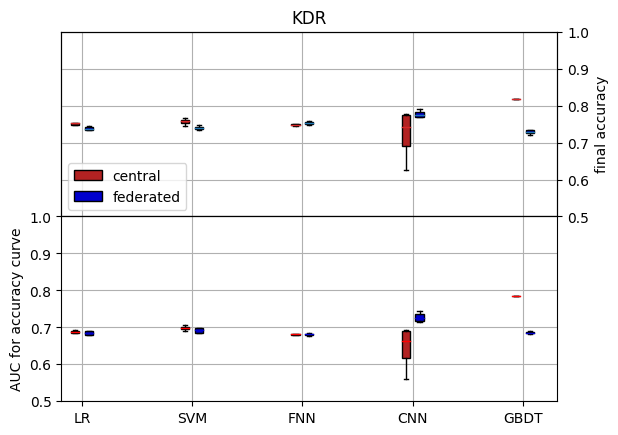

In [150]:
LR_KDR_dict = load_KDR_lr()
SVM_KDR_dict = load_KDR_SVM()
FNN_KDR_dict = load_KDR_FNN()
CNN_KDR_dict = load_KDR_CNN()
DT_KDR_dict = load_KDR_DT()

fed_list = [LR_KDR_dict["acc"].T, SVM_KDR_dict["acc"].T, FNN_KDR_dict["acc"].T, CNN_KDR_dict["acc"].T, DT_KDR_dict["acc"].T]

#dict_list = [LR_KDR_dict, SVM_KDR_dict, FNN_KDR_dict, CNN_KDR_dict, DT_KDR_dict]
cent_list = [LR_KDR_dict["cent acc"], SVM_KDR_dict["cent acc"], FNN_KDR_dict["cent acc"].T, CNN_KDR_dict["cent acc b12"], DT_KDR_dict["cent acc"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex = True, sharey=False)

ax1 = axs[1]
ax2_full = axs[0]

ax2 = ax2_full.twinx()

ax1_color = "black"
ax2_color = "black"

print_metrics = False

for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    
    aucs_iid = np.zeros(min(fed.shape[0], cent.shape[0]))
    aucs_cent = np.zeros(min(fed.shape[0], cent.shape[0]))
    for i in range(fed.shape[0]):
        #print(legend_labels[f_j], cent.shape, fed.shape, aucs_iid.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1],  cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_cent = ax1.boxplot(aucs_cent, positions = [f_j*2 + 0.25], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    bp_iid = ax1.boxplot(aucs_iid, positions = [f_j*2 + 0.5 ], showfliers = False, patch_artist=True, medianprops=dict(color='mediumblue'), boxprops=dict(facecolor="mediumblue"))

    bp_acc_cent = ax2.boxplot(cent[:4,leng -1],positions = [f_j * 2 + 0.25], notch= False, showfliers = False, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:red"), boxprops = dict(facecolor="firebrick", color=ax1_color))
    bp_acc_iid = ax2.boxplot(fed[:4,leng -1],positions = [f_j * 2 + 0.5], notch= False, showfliers = False, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:blue"), boxprops = dict(facecolor="mediumblue", color=ax1_color))
    #bp_acc_si = ax2.boxplot(fed_si[f_j][:4,leng -1],positions = [f_j * 2 + 0.5], notch= False, showfliers = False, capprops = dict(color="tab:cyan"), whiskerprops=dict(color="tab:cyan"), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:orange"), boxprops = dict(facecolor="darkorange", color="tab:cyan"))
    #bp_acc_ci = ax2.boxplot(fed_ci[f_j][:4,leng -1],positions = [f_j * 2 + 0.75], notch= False, showfliers = False, capprops = dict(color="tab:cyan"), whiskerprops=dict(color="tab:cyan"), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:green"), boxprops = dict(facecolor="forestgreen", color="tab:cyan"))
  
    if print_metrics:
        print("final accuracy for " + legend_labels[f_j] + " central: " + str(round(np.mean(cent[:,leng -1 ]), 2)) + " (" + str(round(np.std(cent[:,leng -1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " IID: " + str(round(np.mean(fed[:,leng- 1]), 2)) + " (" + str(round(np.std(fed[:,leng- 1]), 3)) + ")")

        print("Mean AUC for " + legend_labels[f_j] + " central: " + str(round(np.mean(aucs_cent), 2)) + " (" + str(round(np.std(aucs_cent), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " IID: " + str(round(np.mean(aucs_iid), 2)) + " (" + str(round(np.std(aucs_iid), 3)) + ")" )

#print(np.arange(0, len(legend_labels) * 2,2))
#print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
#plt.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0]], ["central", "IID","SI","CI","SCAFFOLD (CI)"])
#ax1.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0],bp_scaf["boxes"][0]], ["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 3, title = "AUC of accuracy curve")
ax2.legend([bp_acc_cent['boxes'][0], bp_acc_iid["boxes"][0]],["central","federated"], loc = 3)
ax1.set_ylim([0.5, 1])
ax2.set_ylim([0.5, 1])
ax2.tick_params(axis="y", labelcolor = ax1_color)
ax2_full.set_yticks([])
ax1.grid(True)
ax2.grid(True)
ax2_full.grid(True)

plt.title("KDR")
plt.xlabel("classifiers")
ax1.set_ylabel("AUC for accuracy curve")
ax2.set_ylabel("final accuracy", color = ax1_color)

plt.savefig("AUC_KDR.eps", format="eps")

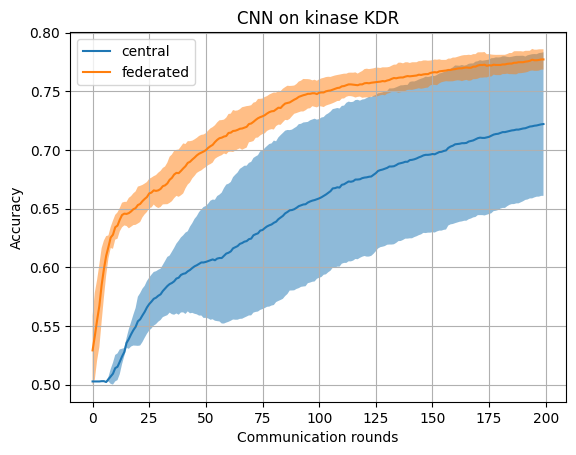

In [40]:
#plot_range(CNN_KDR_dict["cent acc"], alpha = 1, label = "central")
plot_range(CNN_KDR_dict["cent acc b12"][:,:200], alpha = 1, label = "central")
plot_range(CNN_KDR_dict['acc'].T, alpha = 1, label = "federated")

plt.legend()
plt.xlabel("Communication rounds")
plt.ylabel("Accuracy")
plt.title("CNN on kinase KDR")
plt.grid()
#plt.savefig("CNN_KDR.png", format = "png")

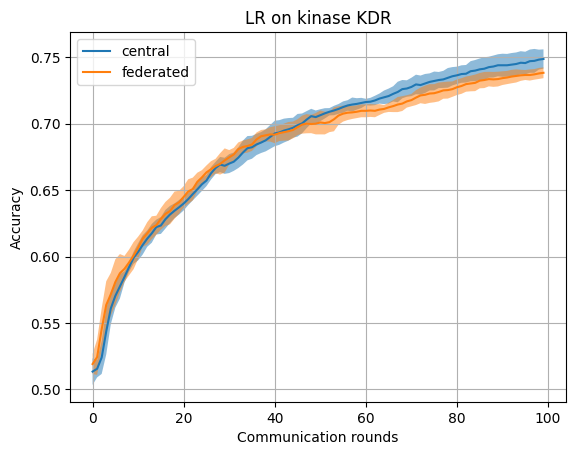

In [41]:
plot_range(LR_KDR_dict["cent acc"], alpha = 1, label = "central")
plot_range(LR_KDR_dict['acc'].T, alpha = 1, label = "federated")

plt.legend()
plt.xlabel("Communication rounds")
plt.ylabel("Accuracy")
plt.title("LR on kinase KDR")
plt.grid()

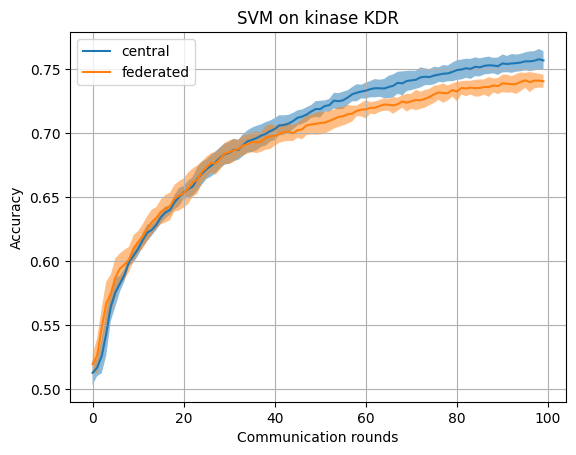

In [43]:
plot_range(SVM_KDR_dict["cent acc"], alpha = 1, label = "central")
plot_range(SVM_KDR_dict['acc'].T, alpha = 1, label = "federated")

plt.legend()
plt.xlabel("Communication rounds")
plt.ylabel("Accuracy")
plt.title("SVM on kinase KDR")
plt.grid()

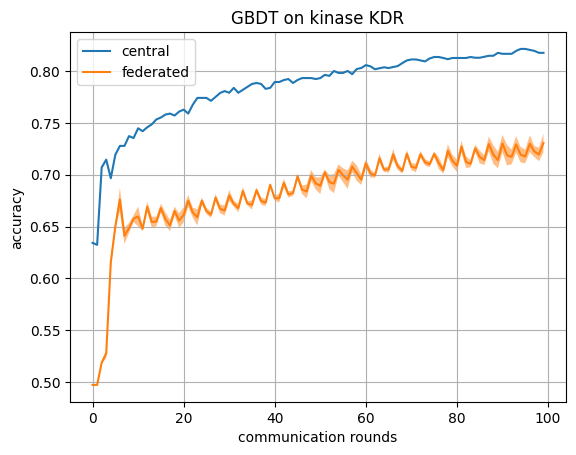

In [42]:
plot_range(DT_KDR_dict["cent acc"], alpha = 1, label = "central")
plot_range(DT_KDR_dict["acc"].T[:,0:100], alpha = 1, label = "federated")
plt.legend()
plt.grid()
plt.ylabel("accuracy")
plt.xlabel("communication rounds")
plt.title("GBDT on kinase KDR")
plt.savefig("KDR_DT.png", format = "png")


## ABL1

<a id='ABL1'></a>

back to [ToC](#ToC)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0 2 4 6 8]


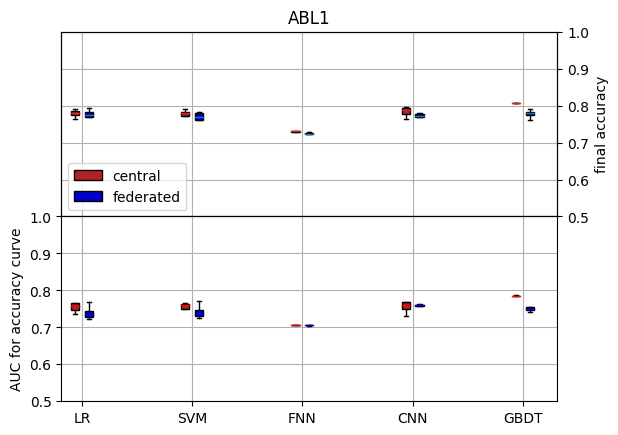

In [157]:
LR_ABL1_dict = load_ABL1_lr()
SVM_ABL1_dict = load_ABL1_SVM()
FNN_ABL1_dict = load_ABL1_FNN()
CNN_ABL1_dict = load_ABL1_CNN()
DT_ABL1_dict = load_ABL1_DT()

fed_list = [LR_ABL1_dict["acc"].T, SVM_ABL1_dict["acc"].T, FNN_ABL1_dict["acc"].T, CNN_ABL1_dict["acc"].T, DT_ABL1_dict["acc"].T]

#dict_list = [LR_ABL1_dict, SVM_ABL1_dict, FNN_ABL1_dict, CNN_ABL1_dict, DT_ABL1_dict]
cent_list = [LR_ABL1_dict["cent acc"], SVM_ABL1_dict["cent acc"], FNN_ABL1_dict["cent acc"], CNN_ABL1_dict["cent acc"], DT_ABL1_dict["cent acc"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex = True, sharey=False)

ax1 = axs[1]
ax2_full = axs[0]

ax2 = ax2_full.twinx()

ax1_color = "black"
ax2_color = "black"

print_metrics = False

for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    
    aucs_iid = np.zeros(min(fed.shape[0], cent.shape[0]))
    aucs_cent = np.zeros(min(fed.shape[0], cent.shape[0]))
    for i in range(fed.shape[0]):
        #print(legend_labels[f_j], cent.shape, fed.shape, aucs_iid.shape)
        
        #print(legend_labels[f_j], fed.shape, fed_ci[f_j].shape)
        leng = min(fed.shape[1],  cent.shape[1])
        aucs_iid[i] = auc(np.linspace(0,1,leng),fed[i,:leng])
        aucs_cent[i] = auc(np.linspace(0,1,leng), cent[i,:leng])

    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_cent = ax1.boxplot(aucs_cent, positions = [f_j*2 + 0.25], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    bp_iid = ax1.boxplot(aucs_iid, positions = [f_j*2 + 0.5 ], showfliers = False, patch_artist=True, medianprops=dict(color='mediumblue'), boxprops=dict(facecolor="mediumblue"))
 
    bp_acc_cent = ax2.boxplot(cent[:4,leng -1],positions = [f_j * 2 + 0.25], notch= False, showfliers = False, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:red"), boxprops = dict(facecolor="firebrick", color=ax1_color))
    bp_acc_iid = ax2.boxplot(fed[:4,leng -1],positions = [f_j * 2 + 0.5], notch= False, showfliers = False, capprops = dict(color=ax1_color), whiskerprops=dict(color=ax1_color), manage_ticks=False, patch_artist=True, medianprops=dict(color="tab:blue"), boxprops = dict(facecolor="mediumblue", color=ax1_color))
   
    if print_metrics:
        print("final accuracy for " + legend_labels[f_j] + " central: " + str(round(np.mean(cent[:,leng -1 ]), 2)) + " (" + str(round(np.std(cent[:,leng -1]), 3)) + ")")
        print("final accuracy for " + legend_labels[f_j] + " IID: " + str(round(np.mean(fed[:,leng- 1]), 2)) + " (" + str(round(np.std(fed[:,leng- 1]), 3)) + ")")

        print("Mean AUC for " + legend_labels[f_j] + " central: " + str(round(np.mean(aucs_cent), 2)) + " (" + str(round(np.std(aucs_cent), 3)) + ")" )
        print("Mean AUC for " + legend_labels[f_j] + " IID: " + str(round(np.mean(aucs_iid), 2)) + " (" + str(round(np.std(aucs_iid), 3)) + ")" )

print(np.arange(0, len(legend_labels) * 2,2))
plt.xticks([0.375, 2.375, 4.375, 6.375, 8.375], legend_labels)
#plt.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0], bp_scaf["boxes"][0]], ["central", "IID","SI","CI","SCAFFOLD (CI)"])
#ax1.legend([bp_cent["boxes"][0], bp_iid["boxes"][0], bp_si["boxes"][0], bp_ci["boxes"][0],bp_scaf["boxes"][0]], ["central","IID","SI","CI", "SCAFFOLD (CI)"], loc = 3, title = "AUC of accuracy curve")
ax2.legend([bp_acc_cent['boxes'][0], bp_acc_iid["boxes"][0]],["central","federated"], loc = 3)
ax1.set_ylim([0.5, 1])
ax2.set_ylim([0.5, 1])
ax2.tick_params(axis="y", labelcolor = ax2_color)
ax1.grid(True)
ax2.grid()
ax2_full.grid()
ax2_full.set_yticks([])
plt.title("ABL1")
plt.xlabel("classifiers")
ax1.set_ylabel("AUC for accuracy curve")
ax2.set_ylabel("final accuracy", color = ax2_color)

plt.savefig("AUC_ABL1.eps", format="eps")

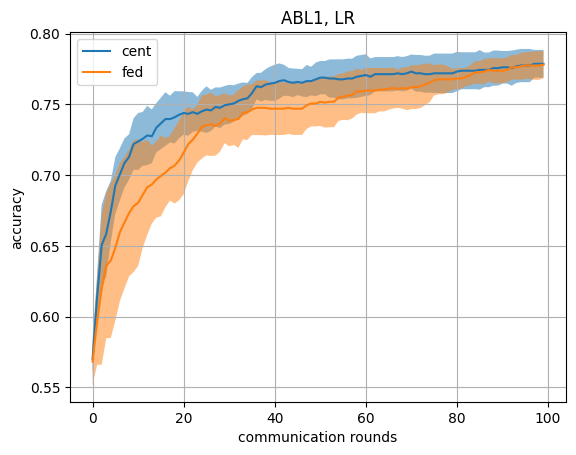

In [46]:
plot_range(LR_ABL1_dict['cent acc'], alpha =1, label = "cent")
plot_range(LR_ABL1_dict["acc"].T, alpha = 1, label= "fed")
plt.grid()
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("ABL1, LR")
plt.legend()
plt.savefig("ABL1_LR.png", format = "png")

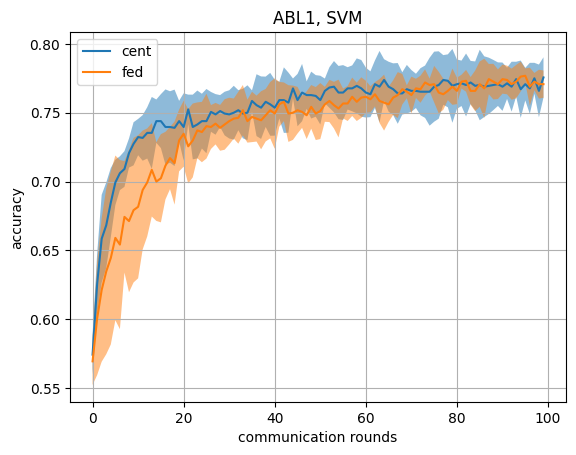

In [48]:
plot_range(SVM_ABL1_dict["cent acc"], alpha = 1, label = "cent")
plot_range(SVM_ABL1_dict["acc"].T, alpha = 1, label = "fed")
plt.grid()
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("ABL1, SVM")
plt.legend()

(0.5, 1.0)

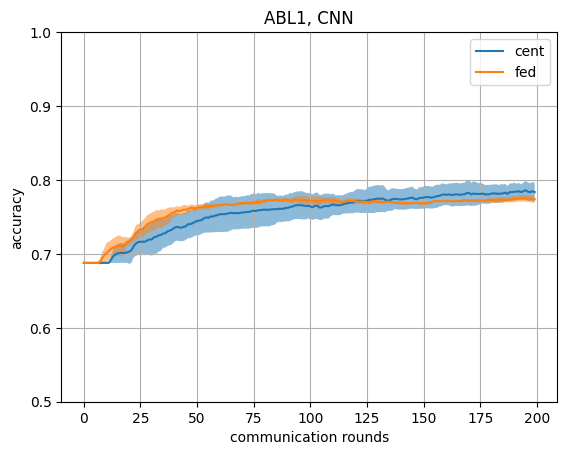

In [4]:
plot_range(CNN_ABL1_dict["cent acc"], alpha = 1, label = "cent")
plot_range(CNN_ABL1_dict["acc"].T, alpha = 1, label = "fed")
plt.grid()
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("ABL1, CNN")
plt.legend()
plt.ylim([0.5, 1])

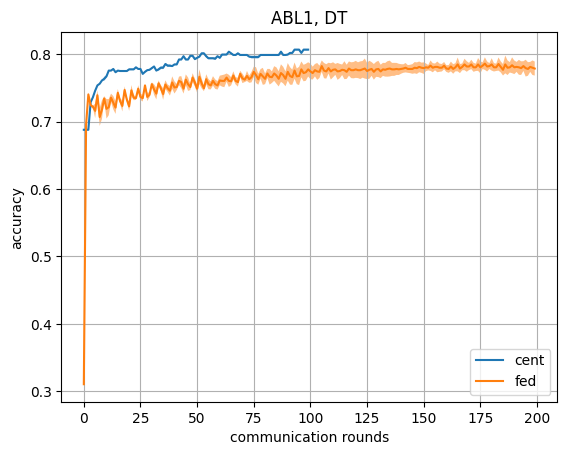

In [6]:
plot_range(DT_ABL1_dict["cent acc"], alpha = 1, label = "cent")
plot_range(DT_ABL1_dict["acc"].T, alpha = 1, label = "fed")
plt.grid()
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("ABL1, DT")
plt.legend()
#plt.ylim([0.5, 1])

## Other stuff (old vizualisations)

In [ ]:
sizes_KDR = [3750, 366, 1169]
fed_files = ["Fed/KDR/slurm-8080208", "Fed/KDR/slurm-8080209", "Fed/KDR/slurm-8080210", "Fed/KDR/slurm-8080211"]
cent_files = ["cent/KDR/slurm-8080076", "cent/KDR/slurm-8080077", "cent/KDR/slurm-8080078", "cent/KDR/slurm-8080079"]
#/home/swier/Documents/FedvsCent/HPC_results/proc_files/Fed/KDR
fed_KDR_FNN = plot_files(fed_files, 'accuracy', sizes_KDR, show_bs = False)
cent_KDR_FNN = plot_files(cent_files, 'accuracy', sizes_KDR, fed=False, show_bs = False)
plt.legend()
plt.title("FNN, KDR")
plt.savefig("FNN_KDR.svg", format="svg")

In [ ]:
plot_range(KDR_LR["acc"].T, alpha = 1, label = "federated")
plot_range(KDR_LR["cent acc"], alpha = 1, label = "central")
plt.grid(True)
plt.title("KDR, LR")
plt.legend()

In [ ]:
DT_dict = load_f_DT()

plot_range(DT_dict["iid"].T, color="blue")
plot_range(DT_dict["ci"].T, color="y")
plot_range(DT_dict["cent"].T, color="r")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid", "ci", "central"])
plt.title("GBDT on fashion MNIST")

In [ ]:
SVM_dict = load_A2_SVM()

plot_range(SVM_dict["iid"].T, color="b")
plot_range(SVM_dict["ci"].T, color="y")
plot_range(SVM_dict["si"].T, color="g")
plot_range(SVM_dict["central"].T[:,0:100], color="r")
plot_range(SVM_dict["central 5e6"].T[:,0:100], color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$","si, \u03B7 = $5*10^{-5}$" ,"central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


In [ ]:
FNN_dict = load_2node_FNN()

plot_range(FNN_dict["iid"].T)
plot_range(FNN_dict["central"])
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("FNN on AML, A3 omitted (\u03B7 = $5*10^{-3}$)")
plt.legend(["federated", "central"])

In [ ]:
KDR_LR = load_KDR_lr()
KDR_SVM = load_KDR_SVM()
KDR_CNN = load_KDR_CNN()
KDR_DT = load_KDR_DT()

fed_list = [KDR_LR["acc"].T, KDR_SVM['acc'].T, fed_KDR_FNN, KDR_CNN["acc"].T, KDR_DT["acc"].T]
cent_list = [KDR_LR["cent acc"], KDR_SVM["cent acc"], cent_KDR_FNN, KDR_CNN["cent acc"], KDR_DT["cent acc"]]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
start_epoch = 20

for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    frd_iid = np.zeros(4)
    frd_ci = np.zeros_like(frd_iid)
    frd_si = np.zeros_like(frd_iid)

    print(fed.shape, cent.shape)
    for i in range(4):

        curve_iid = np.stack([fed[i,start_epoch:min(fed.shape[1], cent.shape[1])], np.arange(fed.shape[1])[start_epoch:min(fed.shape[1], cent.shape[1])]/ min(fed.shape[1], cent.shape[1])], axis = 1)
        curve_cent = np.stack([cent[i,start_epoch:min(fed.shape[1], cent.shape[1])], np.arange(cent.shape[1])[start_epoch:min(fed.shape[1], cent.shape[1])]/ min(fed.shape[1], cent.shape[1])], axis = 1)

        frd_iid[i] = frdist(curve_iid, curve_cent)
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(frd_iid, positions = [f_j], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkgreen"))

plt.grid(True)
plt.title("kinase KDR, after " + str(start_epoch) +  " epochs")
plt.xlabel("classifiers")
plt.ylabel("Frechet distance of accuracy curve after" + str(start_epoch) + " epochs")
plt.xticks([0, 1, 2, 3, 4], ["LR", "SVM", "FNN", "CNN", "GBDT"])
plt.savefig("KDR_frechet.svg", format="svg")

In [ ]:
CNN_dict = load_f_CNN()
colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]

plot_range(CNN_dict["iid"].T, color=colors[0])
plot_range(CNN_dict["cent 5e2"].T, color=colors[1])
plot_range(CNN_dict["cent 5e3"].T, color=colors[3])
plt.legend(["federated, \u03B7 = 0.05","central, \u03B7 = 0.05", "central, \u03B7 = 0.005"],loc=4)
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("CNN on fashion MNIST")
plt.savefig("poster_fashion.svg", format="svg")

In [ ]:
LR_dict = load_f_LR()

plot_range(LR_dict["iid"].T[:,0:100], color="b")
plot_range(LR_dict["ci"].T[:,0:100], color="y")
plot_range(LR_dict["central 5e5"].T[:,0:100], color="r")
plot_range(LR_dict["central 5e6"].T, color="k")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("accuracy")
plt.title("Logistic Regression on fashion MNIST")
plt.legend(["iid, \u03B7 = $5*10^{-5}$","ci, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-5}$", "central, \u03B7 = $5*10^{-6}$"], loc=4)


In [ ]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_list = [LR_2c_dict["iid 5e2"].T, SVM_2c_dict["iid"].T, FNN_2c_dict["iid"], CNN_2c_dict["iid"], DT_2c_dict["iid"].T]
cent_list = [LR_2c_dict["central 5e2"].T, SVM_2c_dict["cent 5e4"].T, FNN_2c_dict["cent 5e1"], CNN_2c_dict["cent 5e2"], DT_2c_dict["cent"].T]

colors = ['b', 'y', 'g', 'r', 'k']

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]


#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 1


fig = plt.figure()
ax = plt.axes()


lines_fed = []
lines_cent = []
for fed, cent, color in zip(fed_list, cent_list, colors):
    line_fed = plot_range(fed, color=color)
    line_cent = plot_range(cent, "-.", color=color)
    
    ax.add_artist(line_fed)
    ax.add_artist(line_cent)
        
    lines_fed.append(line_fed)
    lines_cent.append(line_cent)
    
    #axins.plot(fed)
legend1 = plt.legend(lines_fed, legend_labels, loc=4, title= "federated")
legend2 = plt.legend(lines_cent, legend_labels, loc=4, title= "central", bbox_to_anchor=(0.78,0))

ax.add_artist(legend1)
ax.add_artist(legend2)

ax.grid(True)
ax.set_title("All classifiers on MNIST2 (IID)")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
    
axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))
for fed, cent, color in zip (fed_list, cent_list, colors):
    axins.plot(np.mean(fed, axis = 0), color=color)
    axins.plot(np.mean(cent, axis = 0), "-.", color = color)
    
    
    
    
    

plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)

In [ ]:
LR_2c_dict = load_2c_LR()
curve_fed = LR_2c_dict["iid 5e3"].T
curve_cent = LR_2c_dict["central 5e2"].T

full_curve_fed = np.stack([curve_fed[0,:], np.arange(curve_fed.shape[1])], axis =1 )
full_curve_cent = np.stack([curve_cent[0,:], np.arange(curve_cent.shape[1])], axis = 1)

In [ ]:
plot_range(LR_2c_dict["central 5e4"].T, label = "Central", alpha = 1)
plot_range(LR_2c_dict["iid 5e3"].T, label = "IID", alpha = 0.8)
plot_range(LR_2c_dict["ci"].T, label = "CI", alpha = 0.5)
plot_range(LR_2c_dict["si"].T, label = "SI", alpha = 0.5)
plt.grid(True)
plt.ylabel("accuracy")
plt.xlabel("communication rounds")
plt.legend()
#plt.ylim([0.5, 1])
plt.savefig("MNIST2_LR_opac.svg", format="SVG")
plt.title("MNIST2, LR")

In [ ]:
delta_iid = LR_2c_dict["iid 5e3"] - LR_2c_dict["central 5e4"]
delta_ci = LR_2c_dict["ci"] - LR_2c_dict["central 5e4"]
delta_si = LR_2c_dict["si"] - LR_2c_dict["central 5e4"]

print("iid dist: ", np.mean(delta_iid), ", final acc diff: ", np.mean(delta_iid[-1, :]))
print("ci dist: ", np.mean(delta_ci), ", final acc diff: ", np.mean(delta_ci[-1, :]))
print("si dist: ", np.mean(delta_si), ", final acc diff: ", np.mean(delta_si[-1, :]))

In [ ]:
SVM_2c_dict = load_2c_SVM()
delta_iid = SVM_2c_dict["iid"] - SVM_2c_dict["cent 5e5"]
delta_ci = SVM_2c_dict["ci"] - SVM_2c_dict["cent 5e5"]
delta_si = SVM_2c_dict["si"] - SVM_2c_dict["cent 5e5"]

print("iid dist: ", np.mean(delta_iid), ", final acc diff: ", np.mean(delta_iid[-1, :]))
print("ci dist: ", np.mean(delta_ci), ", final acc diff: ", np.mean(delta_ci[-1, :]))
print("si dist: ", np.mean(delta_si), ", final acc diff: ", np.mean(delta_si[-1, :]))

In [ ]:
FNN_2c_dict = load_2c_FNN()
delta_iid = FNN_2c_dict["iid"] - FNN_2c_dict["cent 5e1"][0:4,:]
delta_ci = FNN_2c_dict["ci"] - FNN_2c_dict["cent 5e1"][0:4,:]
delta_si = FNN_2c_dict["si"] - FNN_2c_dict["cent 5e1"][0:4,:]

print("iid dist: ", np.mean(delta_iid), ", final acc diff: ", np.mean(delta_iid[-1, :]))
print("ci dist: ", np.mean(delta_ci), ", final acc diff: ", np.mean(delta_ci[-1, :]))
print("si dist: ", np.mean(delta_si), ", final acc diff: ", np.mean(delta_si[-1, :]))

In [ ]:
plot_range(LR_2c_dict['central 5e4'].T, label = "central")
plot_range(LR_2c_dict['iid 5e3'].T, label = "federated (iid)")
plt.grid(True)
plt.title("MNIST2, LR")
plt.legend()

In [ ]:
plot_range(LR_2c_dict["iid 5e3"].T, alpha = 1)
plot_range(LR_2c_dict["central 5e4"].T, alpha = 1)
plt.ylim([0.5, 1])

In [ ]:
LR_2c_dict = load_2c_LR()
SVM_2c_dict = load_2c_SVM()
FNN_2c_dict = load_2c_FNN()
CNN_2c_dict = load_2c_CNN()
DT_2c_dict = load_2c_DT()

fed_list = np.array([[LR_2c_dict["iid 5e3"].T, LR_2c_dict["ci"].T, LR_2c_dict['si'].T], [SVM_2c_dict["iid"].T, SVM_2c_dict['ci'].T, SVM_2c_dict["si"].T], 
            [FNN_2c_dict["iid"], FNN_2c_dict["ci"], FNN_2c_dict["si"]],  [CNN_2c_dict["iid"], CNN_2c_dict["ci"], CNN_2c_dict["si"]],
            [DT_2c_dict["iid"].T, DT_2c_dict["ci"].T, DT_2c_dict["si"].T]])
cent_list = [LR_2c_dict["central 5e4"].T, SVM_2c_dict["cent 5e4"].T, FNN_2c_dict["cent 5e1"], CNN_2c_dict["cent 5e2"], DT_2c_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
start_epoch = 20

for f_j in range(len(cent_list)):
    frd_iid = np.zeros(4)
    fed = fed_list[f_j, :]
    cent = cent_list[f_j]
    frd_ci = np.zeros_like(frd_iid)
    frd_si = np.zeros_like(frd_iid)
    #aucs_cent = np.zeros(4)
    for i in range(4):
        curve_iid = np.stack([fed[0][i,start_epoch:-1], np.arange(fed[0].shape[1])[start_epoch:-1]/ fed[0].shape[1]], axis = 1)
        curve_ci = np.stack([fed[1][i,start_epoch:-1], np.arange(fed[1].shape[1])[start_epoch:-1] / fed[1].shape[1]], axis = 1) 
        curve_si = np.stack([fed[2][i,start_epoch:-1], np.arange(fed[2].shape[1])[start_epoch:-1] / fed[2].shape[1]], axis = 1)
        curve_cent = np.stack([cent[i,start_epoch:-1], np.arange(cent.shape[1])[start_epoch:-1]/ cent.shape[1]], axis = 1)

        frd_iid[i] = frdist(curve_iid, curve_cent)
        frd_ci[i] = frdist(curve_ci, curve_cent)
        frd_si[i] = frdist(curve_si, curve_cent)
        #aucs_fed[i] = frdist(np.linspace(0,1,100),fed[i,:])
        #aucs_cent[i] = auc(np.linspace(0,1,100), cent[i,:])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(frd_iid, positions = [f_j*3 -1 ], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkgreen"))
    bp_ci = plt.boxplot(frd_ci, positions = [f_j*3 ], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="firebrick"))
    bp_si = plt.boxplot(frd_si, positions = [f_j*3 + 1], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkblue"))
    #bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.2], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    

plt.legend([bp_iid["boxes"][0], bp_ci["boxes"][0], bp_si["boxes"][0]], ["IID", "CI", "SI"])
plt.grid(True)
plt.title("MNIST2, after " + str(start_epoch) +  " epochs")
plt.xlabel("classifiers")
plt.ylabel("Frechet distance of accuracy curve after" + str(start_epoch) + " epochs")
plt.xticks([0, 3, 6, 9, 12], ["LR", "SVM", "FNN", "CNN", "GBDT"])
#plt.savefig("MNIST2_frechet.svg", format="svg")

In [ ]:
SVM_2c_dict = load_2c_SVM()

plot_keys = ["iid", "cent 5e5"]# "ci", "scaf", "si", "cent 5e5"]
colors = ['b', 'y', 'g', 'r', 'k']
#legend = ["iid", "ci", "scaffold", "si", "central"]
legend = ["federated", "central"]
Xl = 0
Xh = 15

Yl = 0.8
Yh = 1


lines = []

fig = plt.figure()
ax = plt.axes()

for key, color in zip(plot_keys, colors):
    line = plot_range(SVM_2c_dict[key].T, color=color)
    
    #ax.add_artist(line)
    
    lines.append(line)

    
    
    
legend = plt.legend(lines, legend, loc=4)
plt.gca().add_artist(legend)
plt.grid(True)

#axins = zoomed_inset_axes(ax, 2, bbox_to_anchor = (228,215))
#axins.set_xlim(Xl, Xh)
#axins.set_ylim(Yl, Yh)
#plt.setp(axins.get_xticklabels(), visible=False)
#plt.setp(axins.get_yticklabels(), visible=False)
#mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

#for key, color in zip(plot_keys, colors):
#    axins.plot(np.mean(SVM_2c_dict[key], axis=1), color=color)

#axins.plot(SVM_2c_dict["ci"][:,0], color="y")
ax.set_title("Support Vector Machine on MNIST2")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")

In [ ]:
LR_2c_dict = load_2c_LR()
LR_4c_dict = load_4c_LR()

plot_keys_2c = ["iid 5e2", "ci", "scaf", "si", "central 5e3"]
plot_keys_4c = ["iid", "ci", "si","central 5e4", "central 5e5"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "si", "central", "central, lower LR"]
alphas = [1, 1, 1, 0.5, 0.5]
colors = ["#F7967D", "#339EF2", "#D4F4DD", "#4B1D3F", "#010400"]

#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.8
Yh = 0.95

lines_2c = []
lines_4c = []


fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(LR_2c_dict["iid 5e2"])
#axins.plot(LR_2c_dict["iid 5e2"])


for key_2c, key_4c, color, alpha in zip(plot_keys_2c, plot_keys_4c, colors, alphas):
    #line_2c = plot_range(LR_2c_dict[key_2c].T, color = color)
    line_4c = plot_range(LR_4c_dict[key_4c].T, color = color, alpha = alpha)
    
    #ax.add_artist(line_2c)
    ax.add_artist(line_4c)
    
    #lines_2c.append(line_2c)
    lines_4c.append(line_4c)

    
    
#legend1 = plt.legend(lines_2c, legend, loc=4, title= "   MNIST2 \n\u03B7 = $5*10^{-3}$")
legend2 = plt.legend(lines_4c, legend, loc=4)#, title= "\n\u03B7 = $5*10^{-4}$")
#plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_2c, key_4c, color, alpha in zip(plot_keys_2c, plot_keys_4c, colors, alphas):
    #mean_2c = np.mean(LR_2c_dict[key_2c],axis=1)
    mean_4c = np.mean(LR_4c_dict[key_4c], axis=1)
    
    #axins.plot(mean_2c, color=color)
    axins.plot(mean_4c, color=color, alpha = alpha)
    
mean_4c = np.mean(LR_4c_dict['iid'], axis=1)
axins.plot(mean_4c, color=colors[0], alpha = 1)
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(LR_2c_dict["ci"][:,1],color= 'y')
axins.plot(LR_4c_dict["ci"][:,1], color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("MNIST4, Logistic Regression")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")
plt.savefig("poster_MNIST4.svg", format="svg")

In [ ]:
FNN_2c_dict = load_2c_FNN()
FNN_4c_dict = load_4c_FNN()

plot_keys_2c = ["iid", "ci", "scaf", "si", "cent 5e1"]
plot_keys_4c = ["iid", "ci new", "scaf", "si", "cent 5e1"]
colors = ['b', 'y', 'g', 'r', 'k']
legend = ["iid", "ci", "scaffold", "si", "central"]

#X and Y range for zoomed in region
Xl = 0
Xh = 15
Yl = 0.6
Yh = 0.8

lines_2c = []
lines_4c = []


fig = plt.figure()
ax = plt.axes()
#axins = zoomed_inset_axes(ax, 2, loc=10)


#ax.plot(FNN_2c_dict["iid 5e2"])
#axins.plot(FNN_2c_dict["iid 5e2"])


for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    #line_2c = plot_range(FNN_2c_dict[key_2c], color = color)
    line_4c = plot_range(FNN_4c_dict[key_4c], "-.", color = color)
    
    #ax.add_artist(line_2c)
    ax.add_artist(line_4c)
    
    #lines_2c.append(line_2c)
    lines_4c.append(line_4c)

    
    
#legend1 = plt.legend(lines_2c, legend, loc=4, title= "   MNIST2 \n\u03B7 = $5*10^{-1}$")
legend2 = plt.legend(lines_4c, legend, loc=4, title= "   MNIST4 \n\u03B7 = $5*10^{-1}$")
#plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

axins = zoomed_inset_axes(ax, 2, loc=10, bbox_to_anchor=(175,125))

for key_2c, key_4c, color in zip(plot_keys_2c, plot_keys_4c, colors):
    #mean_2c = np.mean(FNN_2c_dict[key_2c],axis=0)
    mean_4c = FNN_4c_dict[key_4c][0,:]
    
    #axins.plot(mean_2c, color=color)
    axins.plot(mean_4c,"-.", color=color)


plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
  
#axins.plot(FNN_2c_dict["ci"][:,1],color= 'y')
#axins.plot(FNN_4c_dict["ci new"][:,1],"-.", color= 'y')
axins.set_xlim(Xl, Xh)
axins.set_ylim(Yl, Yh)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
ax.grid(True)
ax.set_title("MNIST4, FNN")
ax.set_xlabel("communication rounds")
ax.set_ylabel("accuracy")


In [ ]:
LR_f_dict = load_f_LR()
SVM_f_dict = load_f_SVM()
FNN_f_dict = load_f_FNN()
CNN_f_dict = load_f_CNN()
DT_f_dict = load_f_DT()

fed_list = [LR_f_dict["iid"].T, SVM_f_dict['iid'].T, FNN_f_dict["iid"], CNN_f_dict["iid"].T, DT_f_dict["iid"].T]
cent_list = [LR_f_dict["central 5e5"].T, SVM_f_dict["central"], FNN_f_dict["central"], CNN_f_dict["cent 5e2"].T, DT_f_dict["cent"].T]

legend_labels = ["LR", "SVM", "FNN", "CNN", "GBDT"]
start_epoch = 50

for f_j, (fed, cent) in enumerate(zip(fed_list, cent_list)):
    frd_iid = np.zeros(4)
    #fed = fed_list[f_j, :]
    #cent = cent_list[f_j]
    frd_ci = np.zeros_like(frd_iid)
    frd_si = np.zeros_like(frd_iid)
    #aucs_cent = np.zeros(4)
    print(fed.shape, cent.shape)
    for i in range(4):

        curve_iid = np.stack([fed[i,start_epoch:-1], np.arange(fed.shape[1])[start_epoch:-1]/ fed.shape[1]], axis = 1)
        #curve_ci = np.stack([fed[1][i,start_epoch:-1], np.arange(fed[1].shape[1])[start_epoch:-1] / fed[1].shape[1]], axis = 1) 
        #curve_si = np.stack([fed[2][i,start_epoch:-1], np.arange(fed[2].shape[1])[start_epoch:-1] / fed[2].shape[1]], axis = 1)
        curve_cent = np.stack([cent[i,start_epoch:-1], np.arange(cent.shape[1])[start_epoch:-1]/ cent.shape[1]], axis = 1)

        frd_iid[i] = frdist(curve_iid, curve_cent)
        #rd_ci[i] = frdist(curve_ci, curve_cent)
        #rd_si[i] = frdist(curve_si, curve_cent)
        #aucs_fed[i] = frdist(np.linspace(0,1,100),fed[i,:])
        #aucs_cent[i] = auc(np.linspace(0,1,100), cent[i,:])
    line = np.arange(f_j * 4, f_j*4 + 4)
    bp_iid = plt.boxplot(frd_iid, positions = [f_j*3], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkgreen"))
    #bp_ci = plt.boxplot(frd_ci, positions = [f_j*3 ], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="firebrick"))
    #bp_si = plt.boxplot(frd_si, positions = [f_j*3 + 1], showfliers = False, patch_artist=True, medianprops=dict(color='b'), boxprops=dict(facecolor="darkblue"))
    #bp_cent = plt.boxplot(aucs_cent, positions = [f_j*2 + 0.2], showfliers = False, manage_ticks = False, patch_artist=True, medianprops=dict(color='r'), boxprops=dict(facecolor="firebrick"))
    

#plt.legend([bp_iid["boxes"][0], bp_ci["boxes"][0], bp_si["boxes"][0]], ["IID", "CI", "SI"])
plt.grid(True)
plt.title("Fashion MNIST, after " + str(start_epoch) +  " epochs")
plt.xlabel("classifiers")
plt.ylabel("Frechet distance of accuracy curve after" + str(start_epoch) + " epochs")
plt.xticks([0, 3, 6, 9, 12], ["LR", "SVM", "FNN", "CNN", "GBDT"])
plt.savefig("fashion_frechet.svg", format="svg")